In [1]:
R.Version()

$platform
[1] "x86_64-pc-linux-gnu"

$arch
[1] "x86_64"

$os
[1] "linux-gnu"

$system
[1] "x86_64, linux-gnu"

$status
[1] ""

$major
[1] "4"

$minor
[1] "4.0"

$year
[1] "2024"

$month
[1] "04"

$day
[1] "24"

$`svn rev`
[1] "86474"

$language
[1] "R"

$version.string
[1] "R version 4.4.0 (2024-04-24)"

$nickname
[1] "Puppy Cup"

# 1.数据读取

In [1]:
# =======================
# 第一步：数据读取 (GEO数据导入)
# =======================
# 加载GEOquery包以读取GEO系列矩阵数据 (.soft 文件)
if (!requireNamespace("GEOquery", quietly = TRUE)) {
   BiocManager::install("GEOquery")
}
library(GEOquery)

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: http://cran.rstudio.com/

Bioconductor version 3.19 (BiocManager 1.30.23), R 4.4.0 (2024-04-24)

Installing package(s) 'GEOquery'

also installing the dependency ‘Biobase’


Old packages: 'abind', 'actuar', 'ade4', 'adegraphics', 'adehabitatHR',
  'adehabitatLT', 'adehabitatMA', 'admisc', 'AER', 'afex', 'AID', 'akc', 'ale',
  'AlgDesign', 'AlphaSimR', 'amap', 'Amelia', 'antiword', 'anytime', 'ape',
  'aplot', 'apollo', 'aqp', 'arrow', 'ars', 'ARTool', 'arules', 'AsioHeaders',
  'askpass', 'ASMap', 'astsa', 'automap', 'baguette', 'BAS', 'base64',
  'bayesplot', 'bayestestR', 'bbotk', 'BDgraph', 'bedr', 'beepr',
  'Benchmarking', 'betareg', 'BH', 'bibliometrix', 'bigD', 'bigstatsr',
  'bigstep', 'billboarder', 'bindr', 'BiocManager', 'BiodiversityR', 'biomod2',
  'biotools', 'bipartite', 'bit', 'bit64', 'bitops', 'blme', 'b

In [3]:

# 读取GSE40279数据（Genome-wide Methylation Profiles of Human Aging）
# 如果本地有下载的soft文件，可使用filename参数，例如:
# gse40279 <- getGEO(filename="GSE40279_family.soft.gz")

#gse40279 <- getGEO(filename = "path/to/GSE40279_series_matrix.txt.gz", GSEMatrix = TRUE)

# 这里直接通过GSE ID在线获取（需保证网络连接）
gse40279_list <- getGEO("GSE40279", GSEMatrix = TRUE)
#gse40279_list <- getGEO("GSE51388", GSEMatrix = TRUE)
gse40279 <- gse40279_list[[1]]  # 提取ExpressionSet对象

# 读取GSE51388数据（MZ twin methylation longitudinal study）
# gse51388_list <- getGEO("GSE51388", GSEMatrix = TRUE)
# gse51388 <- gse51388_list[[1]]


Found 1 file(s)

GSE40279_series_matrix.txt.gz

Using locally cached version: /tmp/RtmpCtvpqr/GSE40279_series_matrix.txt.gz

Using locally cached version of GPL13534 found here:
/tmp/RtmpCtvpqr/GPL13534.soft.gz 



In [4]:
# 提取表达矩阵和表型数据
exprs1 <- exprs(gse40279)  # GSE40279的甲基化Beta值矩阵，行名为探针ID，列名为样本ID
# exprs2 <- exprs(gse51388)  # GSE51388的矩阵

pheno1 <- pData(gse40279)  # 样本的表型信息，包含年龄等
# pheno2 <- pData(gse51388)
#节省内存
rm(gse40279,'gse40279_list')

In [5]:
structure(exprs1)

,GSM989827,GSM989828,GSM989829,GSM989830,GSM989831,GSM989832,GSM989833,GSM989834,GSM989835,GSM989836,⋯,GSM990618,GSM990619,GSM990620,GSM990621,GSM990622,GSM990623,GSM990624,GSM990625,GSM990626,GSM990627
cg00000029,0.46419740,0.45488330,0.48576390,0.480785400,0.50121950,0.499917500,0.485851800,0.51244220,0.518155200,0.41798640,⋯,0.560958100,0.47208090,0.508501500,0.505192500,0.443411400,0.527495900,0.588331400,0.362994500,0.49914500,0.45860010
cg00000108,0.94109070,0.93903320,0.91880200,0.929908200,0.93454810,0.950542700,0.925855000,0.94133040,0.938527900,0.93381450,⋯,0.934698900,0.97861190,0.922024300,0.963051700,0.992631200,0.958173200,0.982449600,0.954392300,0.93169050,0.97473130
cg00000109,0.91118210,0.59645480,0.87033330,0.889688700,0.89045010,0.898493200,0.893972300,0.89200960,0.900840600,0.88353930,⋯,0.881956800,0.92628860,0.930091000,0.946546600,0.929131000,0.922034000,0.855145000,0.927183500,0.90093840,0.82986870
cg00000165,0.13201370,0.20691670,0.16286130,0.197780100,0.14843740,0.224092900,0.400488500,0.19455320,0.134710300,0.20456900,⋯,0.199882900,0.16511650,0.210248200,0.177351400,0.118742100,0.223068300,0.162179800,0.196429800,0.16747730,0.17057800
cg00000236,0.71786110,0.72393540,0.71919640,0.704061000,0.75491290,0.829191700,0.723781700,0.69514240,0.731872000,0.74291300,⋯,0.759011200,0.79288290,0.730366500,0.783829800,0.787088800,0.778958700,0.796868500,0.713019700,0.73021540,0.78284410
cg00000289,0.68652090,0.61908440,0.63567800,0.610863700,0.65126200,0.692076100,0.676272000,0.67461920,0.711829700,0.70065150,⋯,0.693164000,0.60261640,0.674026000,0.605852200,0.760958600,0.709247900,0.535831500,0.664183600,0.66579220,0.47652440
cg00000292,0.80500280,0.81467190,0.82433580,0.811151500,0.80862780,0.849451500,0.793246400,0.82885830,0.810585300,0.77695370,⋯,0.789454600,0.85145280,0.819372500,0.876083100,0.863835300,0.825768400,0.806713500,0.804045500,0.83136520,0.86380550
cg00000321,0.22824390,0.31087880,0.26321520,0.316760600,0.33828900,0.332558700,0.220229300,0.34545950,0.330990600,0.37872870,⋯,0.368950000,0.30409610,0.329623000,0.264017600,0.192027600,0.354296100,0.295598300,0.395723900,0.33811729,0.25220750
cg00000363,0.33848350,0.41899760,0.42473630,0.398772300,0.36696520,0.337284800,0.368749600,0.37857810,0.383985800,0.37584230,⋯,0.405378700,0.39433810,0.368472800,0.351636300,0.278340100,0.396240700,0.301318700,0.445179300,0.38395330,0.33508980
cg00000622,0.01650754,0.00574665,0.01219747,0.019945160,0.00000000,0.004045347,0.012899920,0.01239960,0.008327145,0.01542100,⋯,0.004701184,0.00000000,0.011038430,0.002829057,0.005292295,0.001777736,0.006685081,0.003821765,0.00000000,0.00000000


In [7]:
structure(pheno1)

,title,geo_accession,status,submission_date,last_update_date,type,channel_count,source_name_ch1,organism_ch1,characteristics_ch1,⋯,contact_zip/postal_code,contact_country,supplementary_file,data_row_count,age (y):ch1,ethnicity:ch1,gender:ch1,plate:ch1,source:ch1,tissue:ch1
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
GSM989827,age 67y 1001,GSM989827,Public on Nov 21 2012,Aug 21 2012,Nov 21 2012,genomic,1,X1001,Homo sapiens,age (y): 67,⋯,98110,USA,NONE,473034,67,Caucasian - European,F,1,UCSD,whole blood
GSM989828,age 89y 1002,GSM989828,Public on Nov 21 2012,Aug 21 2012,Nov 21 2012,genomic,1,X1002,Homo sapiens,age (y): 89,⋯,98110,USA,NONE,473034,89,Caucasian - European,F,1,UCSD,whole blood
GSM989829,age 66y 1003,GSM989829,Public on Nov 21 2012,Aug 21 2012,Nov 21 2012,genomic,1,X1003,Homo sapiens,age (y): 66,⋯,98110,USA,NONE,473034,66,Caucasian - European,F,1,UCSD,whole blood
GSM989830,age 64y 1004,GSM989830,Public on Nov 21 2012,Aug 21 2012,Nov 21 2012,genomic,1,X1004,Homo sapiens,age (y): 64,⋯,98110,USA,NONE,473034,64,Caucasian - European,F,1,UCSD,whole blood
GSM989831,age 62y 1005,GSM989831,Public on Nov 21 2012,Aug 21 2012,Nov 21 2012,genomic,1,X1005,Homo sapiens,age (y): 62,⋯,98110,USA,NONE,473034,62,Caucasian - European,F,1,UCSD,whole blood
GSM989832,age 87y 1006,GSM989832,Public on Nov 21 2012,Aug 21 2012,Nov 21 2012,genomic,1,X1006,Homo sapiens,age (y): 87,⋯,98110,USA,NONE,473034,87,Caucasian - European,F,1,UCSD,whole blood
GSM989833,age 73y 1007,GSM989833,Public on Nov 21 2012,Aug 21 2012,Nov 21 2012,genomic,1,X1007,Homo sapiens,age (y): 73,⋯,98110,USA,NONE,473034,73,Caucasian - European,M,1,UCSD,whole blood
GSM989834,age 75y 1008,GSM989834,Public on Nov 21 2012,Aug 21 2012,Nov 21 2012,genomic,1,X1008,Homo sapiens,age (y): 75,⋯,98110,USA,NONE,473034,75,Caucasian - European,F,1,UCSD,whole blood
GSM989835,age 73y 1009,GSM989835,Public on Nov 21 2012,Aug 21 2012,Nov 21 2012,genomic,1,X1009,Homo sapiens,age (y): 73,⋯,98110,USA,NONE,473034,73,Caucasian - European,F,1,UCSD,whole blood


## 1.2  读取年龄

In [6]:
# 提取年龄信息向量
# 寻找表型数据中表示年龄的列。尝试直接查找"age"关键字
age_col1 <- grep("^age", names(pheno1), ignore.case = TRUE, value = TRUE)
# age_col2 <- grep("^age", names(pheno2), ignore.case = TRUE, value = TRUE)
# 对于GSE40279，如果存在"age"列或类似，则直接提取，否则从title解析
if (length(age_col1) > 0) {
    age1 <- as.numeric(pheno1[[age_col1[1]]])
} else {
    # 从标题中解析年龄，例如"title"包含"age 67y"
    age1 <- as.numeric(sub(".*age ([0-9]+)y.*", "\\1", pheno1$title))
}
# GSE51388有明确的年龄字段
# if (length(age_col2) > 0) {
#     age2 <- as.numeric(pheno2[[age_col2[1]]])
# } else {
#     age2 <- as.numeric(sub(".*age:? *([0-9]+).*", "\\1", pheno2$title))
# }

# 检查年龄数据
length(age1)  # 样本数（656）
# length(age2)  # 样本数（60）
# head(age1); head(age2)  # 可查看部分年龄值确认提取正确

[1] 656

In [7]:
# 为确保两个数据集使用相同的特征集合（探针），取两者探针ID的交集
#common_probes <- intersect(rownames(exprs1), rownames(exprs2))
common_probes <- intersect(rownames(exprs1), rownames(exprs1))
length(common_probes)  # 共有的CpG探针数量
# 按字母序排序以确保顺序一致
common_probes <- sort(common_probes)
# 将表达矩阵限制为共同探针，并确保相同行顺序
exprs1_common <- exprs1[common_probes, ]
#exprs2_common <- exprs2[common_probes, ]

[1] 473034

In [8]:
# 转置矩阵使行表示样本、列表示特征，以便后续分析 (n_samples x p_features)
X_train_full <- t(exprs1_common)  # 训练集（GSE40279）特征矩阵
#X_test_full  <- t(exprs2_common)  # 测试集（GSE51388）特征矩阵
# 检查维度
dim(X_train_full)  # 656 x p (p为共同探针数)
#dim(X_test_full)   # 60 x p

[1]    656 473034

## 1.3 保存原始矩阵,便于反复测试

In [ ]:
#X_original <- X_train_full 

## 1.4 位点名称,即列名

In [9]:
feature_names<- colnames(X_train_full)

In [10]:
head(feature_names)

[1] "cg00000029" "cg00000108" "cg00000109" "cg00000165" "cg00000236"
[6] "cg00000289"

## 尝试特征选择不分割数据集

In [ ]:
# y_train_full <- y_train  # 训练集年龄向量
# y_test <- y_test        # 测试集年龄向量
# X_train_full <-X_train
# X_test_full <- X_test

In [ ]:
# # 确保训练和测试特征矩阵的列名(探针ID)一致，用于模型特征匹配
# all(colnames(X_train_full) == colnames(X_test_full))  # 若TRUE则特征对齐

# 2.数据清洗

0值和缺失值都用均值填补

## 2.1.未分割数据集，填补NA值，不标准化

In [11]:
# =======================
# 第二步：数据清洗 (缺失值处理 & 标准化)
# =======================
# 1. 处理缺失值：
# 检查训练和测试矩阵中是否存在NA缺失值
na_train_count <- sum(is.na(X_train_full))
cat("训练集缺失值数量:", na_train_count,"\n")
# 若存在缺失值，对每个特征列用列均值填充
if (na_train_count > 0) {
    na_cols <- which(apply(X_train_full, 2, anyNA))
    X_train_full[, na_cols] <- apply(X_train_full[, na_cols, drop = FALSE], 2, function(x) ifelse(is.na(x), mean(x, na.rm = TRUE), x))
}
# 若存在缺失值，对每个特征列用列均值填充 (或可选用中位数/knn等方法，这里用均值法)
# if (na_train_count > 0) {
#     na_cols <- which(apply(X_train_full, 2, anyNA))
#     for (j in na_cols) {
#         X_train_full[is.na(X_train_full[, j]), j] <- mean(X_train_full[, j], na.rm = TRUE)
#     }
# }
                                     

# 2. 处理0值：
# 对训练集和测试集中的0值进行替换，替换为该列的均值
zero_train_count <- sum(X_train_full == 0, na.rm = TRUE)
cat("训练集0值数量:", zero_train_count, "\n")

# # 替换训练集中的0值
# for (col in 1:ncol(X_train_full)) {
#     mean_value <- mean(X_train_full[X_train_full[, col] != 0, col], na.rm = TRUE)  # 计算该列的均值（排除0值）
#     X_train_full[X_train_full[, col] == 0, col] <- mean_value  # 将0值替换为均值
# }

# 再次确认无缺失和0值
cat("训练集缺失值数量:", sum(is.na(X_train_full)), "\n")
cat("训练集0值数量:", sum(X_train_full == 0, na.rm = TRUE), "\n")


训练集缺失值数量: 0 
训练集0值数量: 4616287 
训练集缺失值数量: 0 
训练集0值数量: 4616287 


## 2.2 不分割数据集,填补NA值，标准化

In [12]:
# 2. 数据标准化：
# 对DNA甲基化Beta值进行标准化(每个探针列减去平均值除以标准差)，分别对训练和测试集执行
# 训练集标准化参数
X_train_full2 <- X_train_full
train_means <- colMeans(X_train_full2)
train_sds <- apply(X_train_full, 2, sd)
# 对于标准差为0（极少数列完全恒定）的特征，避免除以0；这些特征在训练集中无变化，可考虑删除
zero_sd_cols <- which(train_sds == 0)
if (length(zero_sd_cols) > 0) {
    cat("训练集中有", length(zero_sd_cols), "个探针在所有样本中无变异，将予以移除。\n")
    # 去除这些列
    X_train_full <- X_train_full[, -zero_sd_cols, drop = FALSE]
    X_test_full <- X_test_full[, -zero_sd_cols, drop = FALSE]  # 测试集对应移除
    train_means <- train_means[-zero_sd_cols]
    train_sds <- train_sds[-zero_sd_cols]
}
# 使用训练集的均值和标准差对训练和测试数据进行缩放变换
X_train_full_scaled <- scale(X_train_full, center = train_means, scale = train_sds)



In [13]:
rm('X_train_full2')

In [16]:
# 验证均值约0、方差约1
colMeans(X_train_full_scaled)[1:5]; 
apply(X_train_full_scaled,2,sd)[1:5]

cg00000029    cg00000108    cg00000109    cg00000165    cg00000236 
 3.183852e-16 -5.288685e-16 -6.468086e-16  2.268733e-16 -6.944976e-17

cg00000029 cg00000108 cg00000109 cg00000165 cg00000236 
         1          1          1          1          1

# 3.年龄分布图

In [12]:
# names(grDevices::windowsFonts())       # Windows
system("fc-list :lang=zh", intern=TRUE) # Linux/macOS

[1] "/usr/share/fonts/truetype/droid/DroidSansFallbackFull.ttf: Droid Sans Fallback:style=Regular"

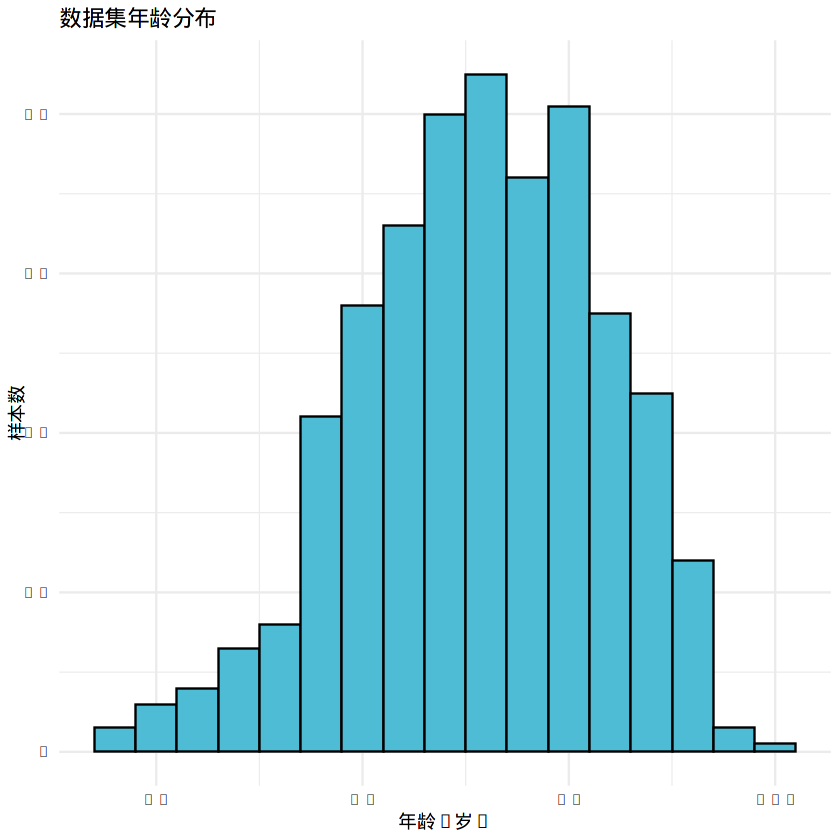

In [13]:
# =======================
# 第三步：年龄分布可视化 (直方图)
# =======================
# 绘制训练集样本年龄分布的直方图，以了解年龄范围和分布
if (!requireNamespace("ggplot2", quietly = TRUE)) {
    install.packages("ggplot2")
}
library(ggplot2)
#age_train <- y_train_full  # 简化名称
age_train <- age1
#age_test <- y_test

# 绘制训练集年龄分布
age_df <- data.frame(Age = age_train)
p1 <- ggplot(age_df, aes(x = Age)) +
    geom_histogram(binwidth = 5, fill="#4EBCD4", color="black") + 
    labs(title="数据集年龄分布", x="年龄(岁)", y="样本数") + 
    theme_minimal() +
    theme(text = element_text(family = "Droid Sans Fallback"))  # 使用系统中可用的中文字体
print(p1)
# 保存图像为文件 (保存为PNG格式)
ggsave("age_distribution_plot.png", plot = p1, width = 8, height = 6, dpi = 300)



In [30]:
# # 绘制训练集年龄分布
# p1 <- ggplot(age_df, aes(x = Age)) +
#     geom_histogram(binwidth = 5, fill="#4EBCD4", color="black") +  # 设置binwidth为5，确保横坐标间距为5
#     labs(title="训练集年龄分布", x="年龄 (岁)", y="样本数") + 
#     theme_minimal() +
#     theme(text = element_text(family = "Droid Sans Fallback")) +  # 使用中文支持字体
#     scale_x_continuous(
#         breaks = seq(min(age_train), max(age_train), by = 5),  # 设置每个bin的刻度标签
#         labels = seq(min(age_train), max(age_train), by = 5)    # 每个刻度显示年龄
#     )

# # 打印图像
# print(p1)

# # 保存图像为文件 (保存为PNG格式)
# ggsave("age_distribution_plot_with_labels.png", plot = p1, width = 8, height = 6, dpi = 300)

In [ ]:
# # 如需要，也可绘制测试集年龄分布以比较
# age_df2 <- data.frame(Age = age_test)
# p2 <- ggplot(age_df2, aes(x = Age)) +
#     geom_histogram(binwidth = 5, fill="#99D17B", color="black") +
#     labs(title="测试集年龄分布", x="年龄 (岁)", y="样本数") +
#     theme_minimal()
# #print(p2)
# show(p2)
# # （可选）将两个直方图并排比较:
# # library(gridExtra)
# # grid.arrange(p1, p2, ncol=2)

# # 从直方图可以看出，训练集年龄范围较广，样本数目较多；测试集为双胞胎研究，样本较少且年龄集中在成年阶段。

# 4. 无用变量删除,腾出内存，便于后续计算

In [14]:
# 查看变量
ls()

[1] "age_col1"                  "age_df"                   
 [3] "age_train"                 "age1"                     
 [5] "auth"                      "common_probes"            
 [7] "exprs1"                    "exprs1_common"            
 [9] "feature_names"             "get_user_secret"          
[11] "GET_USER_SECRET_ENDPOINT"  "KAGGLE_BASE_URL"          
[13] "KAGGLE_IAP_TOKEN"          "KAGGLE_USER_SECRETS_TOKEN"
[15] "na_train_count"            "p1"                       
[17] "pheno1"                    "TokenBigQueryKernel"      
[19] "X_train_full"              "zero_train_count"

In [15]:
rm('zero_sd_cols','zero_train_count','train_means','train_sds')
rm('exprs1','exprs1_common','pheno1','age_col1','age_df','age_train','p1')

Warning message in rm("zero_sd_cols", "zero_train_count", "train_means", "train_sds"):
“object 'zero_sd_cols' not found”
Warning message in rm("zero_sd_cols", "zero_train_count", "train_means", "train_sds"):
“object 'train_means' not found”
Warning message in rm("zero_sd_cols", "zero_train_count", "train_means", "train_sds"):
“object 'train_sds' not found”


In [16]:
# 查看变量
ls()

[1] "age1"                      "auth"                     
 [3] "common_probes"             "feature_names"            
 [5] "get_user_secret"           "GET_USER_SECRET_ENDPOINT" 
 [7] "KAGGLE_BASE_URL"           "KAGGLE_IAP_TOKEN"         
 [9] "KAGGLE_USER_SECRETS_TOKEN" "na_train_count"           
[11] "TokenBigQueryKernel"       "X_train_full"

In [17]:
gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,2188670,116.9,7233404,386.4,8873080,473.9
Vcells,319462360,2437.4,1646175974,12559.4,2036281464,15535.6


# 5.多种特征选择方法

#### 由于DNA甲基化特征维度极高(p >> n)，先进行预筛选以减少特征数。
#### 方法1: 自适应弹性网络+AIC双向回归(BIC更多地惩罚样本量)
#### 方法2: 自适应弹性网络+基于CSIS(条件独立筛选)的方法
#### 方法3: 自适应lasso


# 5.0. Screening 前20000个PCC

**耗时21s左右**

In [18]:
# 加载所需库
library(parallel)  # 并行计算
library(pbapply)   # 进度条
library(glmnet)    # Lasso回归

set.seed(4399)
# 假设 X 和 y 已经定义
# X <- X_train_full_scaled  # 标准化后的训练特征矩阵 (样本 x 特征)
# y <- age1           # 训练年龄

X <- X_train_full  # 训练特征矩阵 (样本 x 特征)
y <- age1           # 训练年龄

# 步骤1: 计算每个特征与预测年龄之间的PCC，加入进度条
# 使用pbapply包为每个特征的PCC计算提供进度条
pcc_values <- pbsapply(1:ncol(X), function(i) {
  cor(X[, i], y)  # 计算每个特征与目标变量之间的Pearson相关系数
})

# 步骤2: 选取PCC值最大的20000个特征
top_pcc_idx <- order(abs(pcc_values), decreasing = TRUE)[1:20000]
X_top_pcc <- X[, top_pcc_idx]  # 获取PCC值最大的20000个特征子集


Loading required package: Matrix

Loaded glmnet 4.1-8



In [19]:
dim(X_top_pcc)

[1]   656 20000

**原论文取的10000个**

## 5.1 自适应弹性网络
论文复现：使用PCC预筛选2万个，再NET选择

## 5.1.1 弹性网络筛选,PCC&MIC

**耗时约16min**

In [23]:
# 步骤3: 调用现有的 feature_selection 函数并加入进度条
library(minerva)       # MIC计算
library(parallel)      # 并行计算
# =======================
# 特征选择函数（集成PCC/MIC方法）
# =======================
feature_selection <- function(X, y, alpha_val = 0.9, n.cores = detectCores()) {
  # 计算统计量
  cor_values <- as.vector(cor(X, y))
  abs_cor_values <- abs(cor_values)
  
  # 并行计算MIC
  mic_result <- mine(X, y, n.cores = n.cores)
  mic_values <- as.vector(mic_result$MIC)
  
  # 计算权重
  eps <- 1e-6
  weight_pcc <- 1 / (abs_cor_values + eps)
  weight_mic <- 1 / (mic_values + eps)
  
  # 弹性网络模型
  cv_pcc <- cv.glmnet(X, y, alpha = alpha_val, penalty.factor = weight_pcc)
  cv_mic <- cv.glmnet(X, y, alpha = alpha_val, penalty.factor = weight_mic)
  
  # 提取特征
  extract_features <- function(model) {
  coefs <- as.vector(coef(model, s = "lambda.min"))[-1]
  colnames(X)[which(coefs != 0)]
 }
    
  features_pcc <- extract_features(cv_pcc)
  features_mic <- extract_features(cv_mic)
  
  # 去冗余处理
  remove_redundant <- function(features, X, cor_thresh = 0.9) {
    if (length(features) < 2) return(features)
    
    cor_mat <- cor(X[, features])
    high_corr <- which(abs(cor_mat) > cor_thresh & upper.tri(cor_mat), arr.ind = TRUE)
    
    to_remove <- c()
    # for (i in 1:nrow(high_corr)) {
    #   f1 <- features[high_corr[i,1]]
    #   f2 <- features[high_corr[i,2]]
    #   if (abs(cor_values[f1]) >= abs(cor_values[f2])) {
    #     to_remove <- c(to_remove, f2)
    #   } else {
    #     to_remove <- c(to_remove, f1)
    #   }
    # }

     for (i in 1:nrow(high_corr)) {
      idx1 <- high_corr[i,1]
      idx2 <- high_corr[i,2]
      f1 <- features[idx1]
      f2 <- features[idx2]
      f1_idx <- which(colnames(X) == f1)
      f2_idx <- which(colnames(X) == f2)
      if (abs(cor_values[f1_idx]) >= abs(cor_values[f2_idx])) {
        to_remove <- c(to_remove, f2)
      } else {
        to_remove <- c(to_remove, f1)
      }
    }

    return(setdiff(features, unique(to_remove)))
  }

  union_features <- union(features_pcc, features_mic)
  #final_features <- union_features
  final_features <- remove_redundant(union_features, X)
  
  return(list(features = final_features, 
              pcc_features = features_pcc,
              mic_features = features_mic))
}

# 步骤4: 特征选择
fs_result <- feature_selection(X_top_pcc, y)
final_features <- fs_result$features

# 输出最终选中的特征个数
cat("最终选中的特征数:", length(final_features), "\n")

# 显示部分选中的特征
cat("选中的部分特征:", head(final_features, 5), "...\n")


## 5.1.2 弹性网络筛选 lasso&岭回归

**耗时约17min**

In [ ]:
# 步骤3: 调用现有的 feature_selection 函数并加入进度条
library(minerva)       # MIC计算
library(parallel)      # 并行计算
library(glmnet)        # Lasso和岭回归

# =======================
# 特征选择函数（集成Lasso和岭回归系数方法）
# =======================
feature_selection <- function(X, y, alpha_val = 0.9, n.cores = detectCores()) {
  # 计算统计量
  cor_values <- as.vector(cor(X, y))
  abs_cor_values <- abs(cor_values)
  
  # 并行计算MIC
  mic_result <- mine(X, y, n.cores = n.cores)
  mic_values <- as.vector(mic_result$MIC)
  
  # 计算Lasso权重 (alpha=1为Lasso回归)
  lasso_model <- cv.glmnet(X, y, alpha = 1)
  lasso_coefs <- as.vector(abs(coef(lasso_model, s = "lambda.min"))[-1])
  
  # 计算岭回归权重 (alpha=0为岭回归)
  ridge_model <- cv.glmnet(X, y, alpha = 0)
  ridge_coefs <- as.vector(abs(coef(ridge_model, s = "lambda.min"))[-1])
  
  # 计算权重，使用系数绝对值的倒数
  eps <- 1e-6  # 避免除以0
  weight_lasso <- 1 / (lasso_coefs + eps)
  weight_ridge <- 1 / (ridge_coefs + eps)
  
  # 弹性网络模型
  cv_lasso <- cv.glmnet(X, y, alpha = alpha_val, penalty.factor = weight_lasso)
  cv_ridge <- cv.glmnet(X, y, alpha = alpha_val, penalty.factor = weight_ridge)
  
  # 提取特征
  extract_features <- function(model) {
    coefs <- as.vector(coef(model, s = "lambda.min"))[-1]
    colnames(X)[which(coefs != 0)]
  }
    
  features_lasso <- extract_features(cv_lasso)
  features_ridge <- extract_features(cv_ridge)
  
  # 去冗余处理
  remove_redundant <- function(features, X, cor_thresh = 0.9) {
    if (length(features) < 2) return(features)
    
    cor_mat <- cor(X[, features])
    high_corr <- which(abs(cor_mat) > cor_thresh & upper.tri(cor_mat), arr.ind = TRUE)
    
    to_remove <- c()
    for (i in 1:nrow(high_corr)) {
      idx1 <- high_corr[i,1]
      idx2 <- high_corr[i,2]
      f1 <- features[idx1]
      f2 <- features[idx2]
      f1_idx <- which(colnames(X) == f1)
      f2_idx <- which(colnames(X) == f2)
      if (abs(cor_values[f1_idx]) >= abs(cor_values[f2_idx])) {
        to_remove <- c(to_remove, f2)
      } else {
        to_remove <- c(to_remove, f1)
      }
    }
    return(setdiff(features, unique(to_remove)))
  }
  
  union_features <- union(features_lasso, features_ridge)
  final_features <- remove_redundant(union_features, X)
  
  return(list(features = final_features, 
              lasso_features = features_lasso,
              ridge_features = features_ridge))
}

# 步骤4: 特征选择
fs_result <- feature_selection(X_top_pcc, y)
final_features <- fs_result$features

# 输出最终选中的特征个数
cat("最终选中的特征数:", length(final_features), "\n")
# 显示部分选中的特征
cat("选中的部分特征:", head(final_features, 5), "...\n")

##  5.1.3基于AIC双向回归筛选最终变量

In [26]:
initial_features <- fs_result$features

# 输出弹性网络选中的特征个数
cat("弹性网络选中的特征数:", length(initial_features), "\n")

# 步骤4: 基于AIC的双向逐步回归筛选
cat("执行AIC双向逐步回归筛选...\n")

# 如果弹性网络选出的特征太多，先取前300个进行双向逐步回归
if(length(initial_features) > 300) {
  # 计算这些特征与目标变量的相关性
  feature_cors <- sapply(initial_features, function(f) {
    abs(cor(X[, f], y))
  })
  
  # 按相关性排序并取前300个
  top_features <- initial_features[order(feature_cors, decreasing = TRUE)[1:300]]
} else {
  top_features <- initial_features
}

# 准备数据框用于逐步回归
X_selected <- as.data.frame(X[, top_features])
colnames(X_selected) <- make.names(top_features, unique = TRUE)  # 确保列名唯一且有效
X_selected$y <- y

# 使用AIC准则进行双向逐步回归
# 从一个仅包含截距的模型开始
start_model <- lm(y ~ 1, data = X_selected)

# 创建一个包含所有变量的模型
full_model <- as.formula(paste("y ~", paste(setdiff(names(X_selected), "y"), collapse = " + ")))
full_fit <- lm(full_model, data = X_selected)

# 双向逐步回归（基于AIC）
cat("正在执行双向逐步回归，这可能需要一些时间...\n")
step_model <- step(start_model, 
                  scope = list(lower = start_model, upper = full_fit),
                  direction = "both", 
                  k = 2,  # AIC准则 (默认为2)
                  trace = 0)  # 不显示冗长的输出

# 提取最终模型的变量
final_vars <- attr(terms(step_model), "term.labels")

# 如果变量超过110个，按系数绝对值大小选择前110个
# if(length(final_vars) > 110) {
#   coefs <- coef(step_model)[-1]  # 去除截距项
#   coefs_abs <- abs(coefs)
#   top_110_idx <- order(coefs_abs, decreasing = TRUE)[1:110]
#   final_vars <- names(coefs)[top_110_idx]
# } else if(length(final_vars) < 110 && length(initial_features) > 110) {
#   # 如果不足110个，从初始特征中补充
#   remaining_features <- setdiff(initial_features, final_vars)
#   remaining_cors <- sapply(remaining_features, function(f) {
#     abs(cor(X[, f], y))
#   })
#   additional_features <- remaining_features[order(remaining_cors, decreasing = TRUE)[1:(110-length(final_vars))]]
#   final_vars <- c(final_vars, additional_features)
# }

# if(length(final_vars) > 100) {
#   coefs <- coef(step_model)[-1]  # 去除截距项
#   coefs_abs <- abs(coefs)
#   top_110_idx <- order(coefs_abs, decreasing = TRUE)[1:100]
#   final_vars <- names(coefs)[top_110_idx]
# } else if(length(final_vars) < 100 && length(initial_features) > 100) {
#   # 如果不足110个，从初始特征中补充
#   remaining_features <- setdiff(initial_features, final_vars)
#   remaining_cors <- sapply(remaining_features, function(f) {
#     abs(cor(X[, f], y))
#   })
#   additional_features <- remaining_features[order(remaining_cors, decreasing = TRUE)[1:(100-length(final_vars))]]
#   final_vars <- c(final_vars, additional_features)
# }
# 输出最终选中的特征个数
cat("最终选中的特征数:", length(final_vars), "\n")

# 显示部分选中的特征
cat("选中的部分特征:", head(final_vars, 5), "...\n")

# 将最终特征保存
final_features <- final_vars

弹性网络选中的特征数: 220 
执行AIC双向逐步回归筛选...
正在执行双向逐步回归，这可能需要一些时间...
最终选中的特征数: 137 
选中的部分特征: cg16867657 cg08097417 cg07571951 cg02452500 cg05826458 ...


In [57]:
# 将最终特征保存
final_features <- final_vars

In [56]:
length1 <- length(final_vars)
length1

[1] 137

## 5.1.4 基于CSIS进行再筛选

In [ ]:
initial_features <- fs_result$features
# 输出弹性网络选中的特征个数
cat("弹性网络选中的特征数:", length(initial_features), "\n")

In [ ]:
# 方法3: 使用CSIS进行筛选 (需MFSIS包)
if (!requireNamespace("MFSIS", quietly = TRUE)) {
    # 使用 devtools 从 GitHub 安装 MFSIS（如果该包在 GitHub 上可用）
    devtools::install_github("cran/MFSIS")
}
library(MFSIS)

In [ ]:
cat("执行CSIS筛选...\n")
# 使用CSIS方法进行特征筛选，设置筛选数量 nsis = n/log(n) (取上整)
n_train <- length(y)
#nsis_val <- ceiling(n_train / log(n_train))
nsis_val <- 100
sel_csis_idx <- MFSIS(X[,initial_features], y, nsis = nsis_val, method = "CSIS")
sel_csis_idx <- as.numeric(sel_csis_idx)  # 转成数值索引
cat("CSIS筛选特征数:", length(sel_csis_idx), "\n")  # 一般为n/log(n)的值

## 5.1.4 前20000个MIC(跑不出来结果)

In [ ]:
# # 加载所需库
# library(minerva)  # MIC计算
# library(parallel) # 并行计算
# library(glmnet)   # Lasso回归
# library(pbapply)  # 进度条

# # 假设 X 和 y 已经定义
# X <- X_train_full_scaled  # 标准化后的训练特征矩阵 (样本 x 特征)
# y <- age1           # 训练年龄

# # 步骤1: 计算每个特征与预测年龄之间的MIC，加入进度条
# # 使用pbapply包为每个特征的MIC计算提供进度条
# mic_values <- pbsapply(1:ncol(X), function(i) {
#   mic_result <- mine(X[, i, drop = FALSE], y, n.cores = detectCores())  # 计算每个特征的MIC
#   mic_result$MIC
# })

# # 步骤2: 选取MIC值最大的20000个特征
# top_mic_idx <- order(mic_values, decreasing = TRUE)[1:20000]
# X_top_mic <- X[, top_mic_idx]  # 获取MIC值最大的20000个特征子集


## 5.2 自适应lasso

**GSE40679(656行)耗时18min**

In [36]:
ls()

[1] "age1"                      "auth"                     
 [3] "avg_metrics"               "common_probes"            
 [5] "feature_names"             "feature_selection"        
 [7] "final_feature_set"         "final_features"           
 [9] "final_vars"                "fs_result"                
[11] "full_fit"                  "full_model"               
[13] "get_user_secret"           "GET_USER_SECRET_ENDPOINT" 
[15] "initial_features"          "KAGGLE_BASE_URL"          
[17] "KAGGLE_IAP_TOKEN"          "KAGGLE_USER_SECRETS_TOKEN"
[19] "length1"                   "lm_model"                 
[21] "models"                    "na_train_count"           
[23] "pcc_values"                "rf_model"                 
[25] "start_model"               "step_model"               
[27] "svr_model"                 "TokenBigQueryKernel"      
[29] "top_features"              "top_pcc_idx"              
[31] "train_control"             "X"                        
[33] "X_final"                   "X_selected"               
[35] "X_top_pcc"                 "X_train_full"             
[37] "X_train_full_scaled"       "xgb_model"                
[39] "y"

## 5.2.1 基于岭回归

**耗时21min**

In [42]:
if (!requireNamespace("glmnet", quietly = TRUE)) {
    install.packages("glmnet")
}
library(glmnet)
set.seed(4399)  # 固定随机种子，保证结果可复现（glmnet等含随机过程）

# 权重方案1：使用岭回归(Ridge, alpha=0)系数的倒数作为适应性权重
#cv_ridge <- cv.glmnet(X, y, alpha = 0)
cv_ridge <- cv.glmnet(X_top_pcc, y, alpha = 0)
best_lambda_ridge <- cv_ridge$lambda.min
ridge_coef <- as.numeric(coef(cv_ridge, s = "lambda.min"))  # 包括截距和系数
ridge_coef <- ridge_coef[-1]  # 去除截距，只保留特征系数

# 计算权重：w1_j = 1/|beta_ridge_j|（如果beta为0，则取很小的epsilon以避免无穷大）
epsilon <- 1e-6
w1 <- 1 / (abs(ridge_coef) + epsilon)
alpha_val <- 1

# 模型1：权重方案1的自适应lasso
#cv_en1 <- cv.glmnet(X, y, alpha = alpha_val, penalty.factor = w1)
cv_en1 <- cv.glmnet(X_top_pcc, y, alpha = alpha_val, penalty.factor = w1)
en1_coef <- as.numeric(coef(cv_en1, s = "lambda.min"))[-1]

# 基于系数绝对值大小排序
sorted_indices <- order(abs(en1_coef), decreasing = TRUE)
# 选取绝对值最高的前length1个特征（如果特征总数少于length1，则选取所有非零特征）
top_feature_count <- min(length1, sum(en1_coef != 0))
sel_w1_idx <- sorted_indices[1:top_feature_count]
sel_w1_features <- feature_names[sel_w1_idx]

cat("基于岭回归自适应lasso选出特征数:", sum(en1_coef != 0), "\n")
cat("选出的是系数绝对值最高的前", top_feature_count, "个特征\n")


基于岭回归自适应lasso选出特征数: 175 
选出的是系数绝对值最高的前 109 个特征


**GSE40679(656行)耗时18min**

## 5.2.2 基于lasso

In [68]:
X <- X_train_full_scaled  # 标准化后的训练特征矩阵 (样本 x 特征)
y <- age1           # 训练年龄

In [29]:
# 权重方案2：使用Lasso(alpha=1)系数的倒数作为权重
#cv_lasso <- cv.glmnet(X, y, alpha = 1)
cv_lasso <- cv.glmnet(X_top_pcc, y, alpha = 1)
best_lambda_lasso <- cv_lasso$lambda.min
lasso_coef <- as.numeric(coef(cv_lasso, s = "lambda.min"))
lasso_coef <- lasso_coef[-1]
# 加一行,只取非0系数
w2 <- 1 / (abs(lasso_coef) + epsilon)

# 模型2：权重方案2的自适应弹性网
#cv_en2 <- cv.glmnet(X, y, alpha = alpha_val, penalty.factor = w2)
cv_en2 <- cv.glmnet(X_top_pcc, y, alpha = alpha_val, penalty.factor = w2)
en2_coef <- as.numeric(coef(cv_en2, s = "lambda.min"))[-1]

# sel_w2_idx <- which(en2_coef != 0)
# sel_w2_features <- feature_names[sel_w2_idx]
# cat("基于lasso自适应lasso选出特征数:", length(sel_w2_features), "\n")

# 基于系数绝对值大小排序
sorted_indices <- order(abs(en2_coef), decreasing = TRUE)
# 选取绝对值最高的前length1个特征（如果特征总数少于length1，则选取所有非零特征）
top_feature_count <- min(length1, sum(en2_coef != 0))
sel_w2_idx <- sorted_indices[1:top_feature_count]
sel_w2_features <- feature_names[sel_w2_idx]

cat("基于lasso自适应lasso选出特征数:", sum(en2_coef != 0), "\n")
cat("选出的是系数绝对值最高的前", top_feature_count, "个特征\n")

基于lasso自适应lasso选出特征数: 24 
选出的是系数绝对值最高的前 24 个特征


In [30]:
head(sel_w2_idx)

[1]    1    5   28  121 4339   30

In [31]:
# 合并两种方案得到的特征并集
union_features <- union(sel_w1_features, sel_w2_features)
cat("两种权重方案特征并集数量:", length(union_features),
    " (其中共有特征", length(intersect(sel_w1_features, sel_w2_features)), "个)\n")

两种权重方案特征并集数量: 109  (其中共有特征 24 个)


In [ ]:
# # =======================
# # 第五步：特征选择 (自适应弹性网 & 去冗余)
# # =======================
# # 采用自适应弹性网络进行特征选择：
# # 1) 基于文献方法，选择两种不同的权重方案，对候选特征集分别进行加权弹性网回归。
# # 2) 分别获取两种权重方案下模型选出的特征集合，取并集作为初始选择特征。
# # 3) 对该并集特征通过相关性分析去除冗余（高度共线）特征。
# # 最终得到精简的特征集合。

# if (!requireNamespace("glmnet", quietly = TRUE)) {
#     install.packages("glmnet")
# }
# library(glmnet)

# set.seed(4399)  # 固定随机种子，保证结果可复现（glmnet等含随机过程）

# # 权重方案1：使用岭回归(Ridge, alpha=0)系数的倒数作为适应性权重
# cv_ridge <- cv.glmnet(X_candidate, y, alpha = 0)
# best_lambda_ridge <- cv_ridge$lambda.min
# ridge_coef <- as.numeric(coef(cv_ridge, s = "lambda.min"))  # 包括截距和系数
# ridge_coef <- ridge_coef[-1]  # 去除截距，只保留特征系数
# # 计算权重：w1_j = 1/|beta_ridge_j|（如果beta为0，则取很小的epsilon以避免无穷大）
# epsilon <- 1e-6
# w1 <- 1 / (abs(ridge_coef) + epsilon)

# # 权重方案2：使用Lasso(alpha=1)系数的倒数作为权重
# cv_lasso <- cv.glmnet(X_candidate, y, alpha = 1)
# best_lambda_lasso <- cv_lasso$lambda.min
# lasso_coef <- as.numeric(coef(cv_lasso, s = "lambda.min"))
# lasso_coef <- lasso_coef[-1]
# w2 <- 1 / (abs(lasso_coef) + epsilon)

# # 在两种权重下分别进行弹性网回归 (alpha可选0.5以兼顾L1和L2惩罚)
# alpha_val <- 0.9
# # 模型1：权重方案1的自适应弹性网
# cv_en1 <- cv.glmnet(X_candidate, y, alpha = alpha_val, penalty.factor = w1)
# en1_coef <- as.numeric(coef(cv_en1, s = "lambda.min"))[-1]
# sel_w1_idx <- which(en1_coef != 0)
# sel_w1_features <- candidate_features_names[sel_w1_idx]
# cat("自适应EN(权重方案1)选出特征数:", length(sel_w1_features), "\n")

# # 模型2：权重方案2的自适应弹性网
# cv_en2 <- cv.glmnet(X_candidate, y, alpha = alpha_val, penalty.factor = w2)
# en2_coef <- as.numeric(coef(cv_en2, s = "lambda.min"))[-1]
# sel_w2_idx <- which(en2_coef != 0)
# sel_w2_features <- candidate_features_names[sel_w2_idx]
# cat("自适应EN(权重方案2)选出特征数:", length(sel_w2_features), "\n")

# # 合并两种方案得到的特征并集
# union_features <- union(sel_w1_features, sel_w2_features)
# cat("两种权重方案特征并集数量:", length(union_features),
#     " (其中共有特征", length(intersect(sel_w1_features, sel_w2_features)), "个)\n")


In [ ]:
# # 去除冗余特征：计算并集特征两两之间的相关性，若高于阈值则剔除冗余
# final_feature_set <- union_features  # 初始化为并集
# # 计算训练集上final_feature_set中特征的相关矩阵
# X_union <- X[, final_feature_set]  # 训练集中这些特征的矩阵
# corr_matrix <- cor(X_union)
# # 设置相关性阈值，例如0.9，若一对特征相关系数大于0.9则认为冗余
# corr_thresh <- 0.9
# # 找出相关性大于阈值的特征对，并移除其中一个（保留与年龄相关性更高者）
# high_corr_pairs <- which(abs(corr_matrix) > corr_thresh & lower.tri(corr_matrix), arr.ind = TRUE)
# to_remove <- c()

# if (nrow(high_corr_pairs) > 0) {
#     for (k in 1:nrow(high_corr_pairs)) {
#         i <- high_corr_pairs[k, 1]; j <- high_corr_pairs[k, 2]
#         feat_i <- colnames(corr_matrix)[i]
#         feat_j <- colnames(corr_matrix)[j]
#         if (feat_i %in% to_remove || feat_j %in% to_remove) {
#             next  # 若已标记移除则跳过
#         }
#         # 比较两特征与年龄的相关系数大小（使用此前计算的cors向量）
#         cor_i_y <- abs(cors[feat_i])
#         cor_j_y <- abs(cors[feat_j])
        
#         # 如果相关系数为NA，跳过该特征对
#         if (is.na(cor_i_y) | is.na(cor_j_y)) {
#             next
#         }
        
#         # 移除相关性略小者
#         if (cor_i_y >= cor_j_y) {
#             to_remove <- c(to_remove, feat_j)
#         } else {
#             to_remove <- c(to_remove, feat_i)
#         }
#     }
#     final_feature_set <- setdiff(final_feature_set, to_remove)
# }
# cat("冗余特征去除后剩余特征数:", length(final_feature_set), "\n")

# # 列出最终选定的重要CpG特征
# final_feature_set_sorted <- final_feature_set[order(abs(cors[final_feature_set]), decreasing = TRUE)]
# cat("最终选定特征列表 (按与年龄相关性排序, 前10个):\n", head(final_feature_set_sorted, 10), "\n")


## 5.3 SIS类方法(替换为别的selection)

In [39]:
# 方法3: 使用CSIS进行筛选 (需MFSIS包)
if (!requireNamespace("MFSIS", quietly = TRUE)) {
    # 使用 devtools 从 GitHub 安装 MFSIS（如果该包在 GitHub 上可用）
    devtools::install_github("cran/MFSIS")
}
library(MFSIS)

Rcpp       (1.0.12 -> 1.0.14  ) [CRAN]
withr      (3.0.0  -> 3.0.2   ) [CRAN]
rlang      (1.1.4  -> 1.1.5   ) [CRAN]
jsonlite   (1.8.8  -> 1.9.1   ) [CRAN]
RcppTOML   (0.2.2  -> 0.2.3   ) [CRAN]
mvtnorm    (1.2-5  -> 1.3-3   ) [CRAN]
gam        (1.22-3 -> 1.22-5  ) [CRAN]
dr         (NA     -> 3.0.10  ) [CRAN]
cli        (3.6.3  -> 3.6.4   ) [CRAN]
reticulate (1.38.0 -> 1.41.0.1) [CRAN]
Ball       (NA     -> 1.3.13  ) [CRAN]


Installing 11 packages: Rcpp, withr, rlang, jsonlite, RcppTOML, mvtnorm, gam, dr, cli, reticulate, Ball

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in i.p(...):
“installation of package ‘rlang’ had non-zero exit status”
Warning message in i.p(...):
“installation of package ‘jsonlite’ had non-zero exit status”
Warning message in i.p(...):
“installation of package ‘cli’ had non-zero exit status”


── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpSQ0dhV/remotes216aef69b/cran-MFSIS-41beed2/DESCRIPTION’ ... OK
* preparing ‘MFSIS’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘MFSIS_0.3.0.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# 使用CSIS方法进行特征筛选，设置筛选数量 nsis = n/log(n) (取上整)
nsis_val <- ceiling(n_train / log(n_train))
nsis_val

In [42]:
nsis_val <- length1
nsis_val

[1] 106

In [43]:
sel_csis_idx <- MFSIS(X, y, nsis = nsis_val, method = "CSIS")
#sel_csis_idx <- as.numeric(sel_csis_idx)  # 转成数值索引
cat("CSIS筛选特征数:", length(sel_csis_idx), "\n")  # 一般为n/log(n)的值

CSIS筛选特征数: 106 


In [44]:
head(sel_csis_idx)

[1] 301867 422694 125882 386708 143282 374187

In [ ]:
# # 使用CSIS方法进行特征筛选，设置筛选数量 nsis = n/log(n) (取上整)
# nsis_val <- ceiling(n_train / log(n_train))
# sel_dcsis_idx <- MFSIS(X, y, nsis = nsis_val, method = "DCSIS")
# sel_dcsis_idx <- as.numeric(sel_dcsis_idx)  # 转成数值索引
# cat("DCSIS筛选特征数:", length(sel_dcsis_idx), "\n")  # 一般为n/log(n)的值

In [ ]:
# # 使用CSIS方法进行特征筛选，设置筛选数量 nsis = n/log(n) (取上整)
# nsis_val <- ceiling(n_train / log(n_train))
# sel_sirs_idx <- MFSIS(X, y, nsis = nsis_val, method = "SIRS")
# sel_sirs_idx <- as.numeric(sel_sirs_idx)  # 转成数值索引
# cat("SIRS筛选特征数:", length(sel_sirs_idx), "\n")  # 一般为n/log(n)的值

In [ ]:
# # 使用CSIS方法进行特征筛选，设置筛选数量 nsis = n/log(n) (取上整)
# nsis_val <- ceiling(n_train / log(n_train))
# sel_sis_idx <- MFSIS(X, y, nsis = nsis_val, method = "SIS")
# sel_sis_idx <- as.numeric(sel_sis_idx)  # 转成数值索引
# cat("SIS筛选特征数:", length(sel_sis_idx), "\n")  # 一般为n/log(n)的值

## 5.4 lasso

In [35]:
# 加载所需库
library(parallel)  # 并行计算
library(pbapply)   # 进度条
library(glmnet)    # Lasso回归

set.seed(4399)

# 权重方案2：使用Lasso(alpha=1)系数的倒数作为权重
#cv_lasso <- cv.glmnet(X, y, alpha = 1)
cv_lasso <- cv.glmnet(X_top_pcc, y, alpha = 1)
best_lambda_lasso <- cv_lasso$lambda.min
lasso_coef <- as.numeric(coef(cv_lasso, s = "lambda.min"))
lasso_coef <- lasso_coef[-1]


cat("lasso原本选出特征数:", length(lasso_coef), "\n")

lasso原本选出特征数: 20000 


In [39]:
length(lasso_coef[lasso_coef != 0])

[1] 307

In [36]:
length1 <-137
# 基于系数绝对值大小排序
sorted_indices <- order(abs(lasso_coef), decreasing = TRUE)
# 选取绝对值最高的前100个特征（如果特征总数少于100，则选取所有非零特征）
top_feature_count <- min(length1, sum(lasso_coef != 0))
sel_ls_idx <- sorted_indices[1:top_feature_count]
sel_ls_features <- feature_names[sel_ls_idx]

cat("lasso原本选出特征数:", length(lasso_coef), "\n")
cat("基于lasso选出特征数:", length(sel_ls_features), "\n")

lasso原本选出特征数: 20000 
基于lasso选出特征数: 137 


## 5.4 弹性网络

In [ ]:
# 加载所需库
library(parallel)  # 并行计算
library(pbapply)   # 进度条
library(glmnet)    # 弹性网络回归
set.seed(4399)

# 权重方案2：使用弹性网络(alpha=0.5)系数的倒数作为权重
# alpha=0.5代表Lasso和Ridge的混合，可根据需要调整
cv_elastic <- cv.glmnet(X_top_pcc, y, alpha = 0.9)  
best_lambda_elastic <- cv_elastic$lambda.min
elastic_coef <- as.numeric(coef(cv_elastic, s = "lambda.min"))
elastic_coef <- elastic_coef[-1]  # 移除截距

# 基于系数绝对值大小排序
sorted_indices <- order(abs(elastic_coef), decreasing = TRUE)

# cat("弹性网络原本选出特征数:", length(elastic_coef), "\n")
cat("基于岭回归自适应lasso选出特征数:", sum(elastic_coef != 0), "\n")

In [ ]:
length1 <- 137
# 选取绝对值最高的前100个特征（如果特征总数少于100，则选取所有非零特征）
top_feature_count <- min(length1, sum(elastic_coef != 0))
sel_en_idx <- sorted_indices[1:top_feature_count]
sel_en_features <- feature_names[sel_en_idx]

cat("弹性网络原本选出特征数:", sum(elastic_coef != 0), "\n")
cat("基于弹性网络选出特征数:", length(sel_en_features), "\n")

## 5.5 PCC

In [48]:
length1

[1] 137

In [50]:
# 步骤2: 选取PCC值最大的length1个特征
top_pcc_idx2 <- order(abs(pcc_values), decreasing = TRUE)[1:length1]
#X_top_pcc2 <- X[, top_pcc_idx2]  # 获取PCC值最大的20000个特征子集
length(top_pcc_idx2)

[1] 137

## 5.6 树模型

In [85]:
# 安装并加载必要的包
if (!require("randomForest")) install.packages("randomForest")
if (!require("caret")) install.packages("caret")
library(randomForest)
library(caret)

# 假设X是特征数据框，y是年龄向量
# 如果你的数据是分开的，需要合并为一个数据框进行处理
data <- cbind(y, X_top_pcc)

**耗时约**

In [ ]:
# 设置训练集和测试集
set.seed(4399)
# trainIndex <- createDataPartition(y, p = 0.7, list = FALSE)
# trainData <- data[trainIndex, ]
# testData <- data[-trainIndex, ]

# 构建随机森林模型用于回归（年龄预测）
set.seed(4399)
rf_model <- randomForest(
  y ~ .,
  #data = trainData,
  data = data,
  ntree = 500,          # 树的数量
  importance = TRUE,    # 计算变量重要性
  mtry = floor(sqrt(ncol(X)))  # 每个节点考虑的特征数量
)

# 查看模型
print(rf_model)

In [45]:
# 提取特征重要性
importance_matrix <- importance(rf_model)
print(importance_matrix)

# 可视化特征重要性
varImpPlot(rf_model, main = "特征重要性 - 年龄预测", sort = TRUE)

# 按重要性排序变量 (使用%IncMSE作为回归问题的重要性指标)
var_importance <- importance(rf_model)
sorted_vars <- rownames(var_importance)[order(var_importance[, "%IncMSE"], decreasing = TRUE)]

print("按重要性排序的变量:")
print(sorted_vars)

ERROR: Error in UseMethod("importance"): no applicable method for 'importance' applied to an object of class "train"


In [ ]:
# 基于特征重要性选择顶部变量
# 你可以选择固定数量的特征
top_n_vars <- 10  # 调整为你希望选择的特征数量
selected_vars <- sorted_vars[1:min(top_n_vars, length(sorted_vars))]

# 或者基于重要性阈值选择特征
# importance_threshold <- 5  # 设置一个重要性阈值
# selected_vars <- rownames(var_importance)[var_importance[, "%IncMSE"] > importance_threshold]

print("选定的顶部变量:")
print(selected_vars)

In [ ]:
# 使用选定的变量创建新的数据集
formula_selected <- as.formula(paste("y ~", paste(selected_vars, collapse = " + ")))
print(formula_selected)


In [ ]:
# 使用选定的特征构建新的随机森林模型
rf_model_selected <- randomForest(
  formula_selected,
  data = trainData,
  ntree = 500,
  importance = TRUE
)

# 在测试集上评估模型
predictions <- predict(rf_model_selected, testData)
mse <- mean((predictions - testData$y)^2)
rmse <- sqrt(mse)
mae <- mean(abs(predictions - testData$y))
r_squared <- 1 - sum((testData$y - predictions)^2) / sum((testData$y - mean(testData$y))^2)

print(paste("选定特征模型的RMSE:", rmse))
print(paste("选定特征模型的MAE:", mae))
print(paste("选定特征模型的R²:", r_squared))


In [ ]:
# 比较完整模型和特征选择后的模型
predictions_full <- predict(rf_model, testData)
mse_full <- mean((predictions_full - testData$y)^2)
rmse_full <- sqrt(mse_full)
mae_full <- mean(abs(predictions_full - testData$y))
r_squared_full <- 1 - sum((testData$y - predictions_full)^2) / sum((testData$y - mean(testData$y))^2)

print(paste("完整模型的RMSE:", rmse_full))
print(paste("完整模型的MAE:", mae_full))
print(paste("完整模型的R²:", r_squared_full))

## 5.7.1 RF-RFE

In [ ]:
# 递归特征消除法(RFE)
control <- rfeControl(
  functions = rfFuncs,  # 使用随机森林
  method = "cv",        # 交叉验证
  number = 5            # 5折交叉验证
)

# 运行RFE算法
# 注意：对于大型数据集，这可能需要很长时间
rfe_result <- rfe(
  x = trainData[, -1],  # 预测变量
  y = trainData$y,      # 目标变量
  sizes = c(5, 10, 15, 20, 25),  # 尝试不同的特征数量，根据你的需求修改
  rfeControl = control
)

# 打印结果
print(rfe_result)
print(predictors(rfe_result))


In [ ]:
# 可视化RFE结果
plot(rfe_result, type = c("g", "o"))

# 保存选定的特征子集
selected_features <- predictors(rfe_result)
write.csv(selected_features, "selected_features_age_prediction.csv", row.names = FALSE)

# 创建最终的特征选择数据集
X_final_selected <- X_final[, selected_features]

# 保存用于建模的最终数据集
final_data <- cbind(y = y, X_final_selected)
write.csv(final_data, "final_selected_data_age_prediction.csv", row.names = FALSE)

# 输出特征重要性排序结果
importance_df <- data.frame(
  Feature = rownames(var_importance),
  Importance = var_importance[, "%IncMSE"]
)
importance_df <- importance_df[order(importance_df$Importance, decreasing = TRUE), ]
write.csv(importance_df, "feature_importance_age_prediction.csv", row.names = FALSE)

## 5.7.2 SVM-RFE

In [86]:
# 加载必要的库
library(e1071)      # 用于支持向量机
library(caret)      # 用于特征选择和模型评估
library(randomForest) # 用于可视化比较

# 假设我们已经有了特征矩阵X_final和目标变量y
# X_final: 特征矩阵，每行是一个样本，每列是一个特征
# y: 年龄向量

# 设置随机种子以确保结果可重复
set.seed(123)

# # 划分训练集和测试集 (80% 训练, 20% 测试)
# trainIndex <- createDataPartition(y, p = 0.8, list = FALSE)
# X_train <- X_final[trainIndex, ]
# X_test <- X_final[-trainIndex, ]
# y_train <- y[trainIndex]
# y_test <- y[-trainIndex]

X_train<- X_top_pcc
y_train <-y
# 创建一个数据框，将特征和目标变量组合在一起
train_data <- data.frame(X_train, Age = y_train)
#test_data <- data.frame(X_test, Age = y_test)


In [87]:
# 定义控制参数用于RFE
ctrl <- rfeControl(
  functions = caretSBF,
  method = "cv",
  number = 5,    # 5折交叉验证
  verbose = TRUE,
  returnResamp = "all"
)

# 定义SVR模型
svr_model <- train(
  x = X_train,
  y = y_train,
  method = "svmRadial",  # 径向基核SVM
  tuneLength = 10,       # 自动调整参数
  trControl = trainControl(method = "cv", number = 5)
)

In [1]:
# 运行递归特征消除(RFE)算法
# 选择从1到所有特征数量的最优特征子集
rfe_results <- rfe(
  x = X_train,
  y = y_train,
  #sizes = c(1:ncol(X_train)),  # 测试不同数量的特征
  sizes = length1,
  rfeControl = ctrl,
  method = "svmRadial",        # 使用径向基核SVM
  tuneLength = 5               # 超参数调整
)

# 打印RFE结果
print(rfe_results)

ERROR: Error in rfe(x = X_train, y = y_train, sizes = length1, rfeControl = ctrl, : could not find function "rfe"


In [ ]:
# 获取最优特征子集
optimal_features <- predictors(rfe_results)
print("最优特征子集:")
print(optimal_features)

In [ ]:

# 使用最优特征子集重新训练模型
final_model <- train(
  x = X_train[, optimal_features],
  y = y_train,
  method = "svmRadial",
  tuneLength = 10,
  trControl = trainControl(method = "cv", number = 5)
)

# 打印最终模型
print(final_model)

# 在测试集上进行预测
predictions <- predict(final_model, X_test[, optimal_features])

# 评估模型性能
rmse <- sqrt(mean((predictions - y_test)^2))
mae <- mean(abs(predictions - y_test))
r_squared <- cor(predictions, y_test)^2

cat("测试集性能指标:\n")
cat("RMSE (均方根误差): ", rmse, "\n")
cat("MAE (平均绝对误差): ", mae, "\n")
cat("R² (决定系数): ", r_squared, "\n")

# 可视化预测结果
plot(y_test, predictions, 
     main = "实际年龄 vs. 预测年龄",
     xlab = "实际年龄", 
     ylab = "预测年龄",
     pch = 16, 
     col = "blue")
abline(0, 1, col = "red", lwd = 2)  # 添加对角线作为参考

# 可视化特征重要性
varImpPlot <- function(model, feature_names) {
  importance <- varImp(model, scale = FALSE)
  barplot(importance$importance[,1], 
          names.arg = feature_names,
          main = "特征重要性",
          col = "skyblue",
          las = 2,  # 使特征名称垂直显示
          cex.names = 0.7)  # 调整特征名称大小
}

varImpPlot(final_model, optimal_features)

# 额外可视化：RFE过程中不同特征数量的性能变化
plot(rfe_results, type = c("g", "o"))

# 保存最终模型
saveRDS(final_model, "age_prediction_svr_model.rds")

# 比较多种方法(可选)
# 使用相同的特征集，比较不同模型的性能
compare_models <- function(X_train, y_train, X_test, y_test, features) {
  # SVR模型
  svr <- train(
    x = X_train[, features],
    y = y_train,
    method = "svmRadial",
    tuneLength = 5,
    trControl = trainControl(method = "cv", number = 5)
  )
  
  # 随机森林
  rf <- train(
    x = X_train[, features],
    y = y_train,
    method = "rf",
    tuneLength = 5,
    trControl = trainControl(method = "cv", number = 5)
  )
  
  # XGBoost
  if(require(xgboost)) {
    xgb <- train(
      x = X_train[, features],
      y = y_train,
      method = "xgbTree",
      tuneLength = 5,
      trControl = trainControl(method = "cv", number = 5)
    )
  } else {
    xgb <- NULL
    warning("xgboost包未安装，跳过XGBoost模型")
  }
  
  # 创建结果列表
  models <- list(SVR = svr, RandomForest = rf, XGBoost = xgb)
  results <- data.frame(Model = character(), RMSE = numeric(), MAE = numeric(), R2 = numeric())
  
  for(name in names(models)) {
    if(!is.null(models[[name]])) {
      pred <- predict(models[[name]], X_test[, features])
      rmse <- sqrt(mean((pred - y_test)^2))
      mae <- mean(abs(pred - y_test))
      r2 <- cor(pred, y_test)^2
      
      results <- rbind(results, data.frame(Model = name, RMSE = rmse, MAE = mae, R2 = r2))
    }
  }
  
  return(results)
}

# 比较不同模型的性能
model_comparison <- compare_models(X_train, y_train, X_test, y_test, optimal_features)
print(model_comparison)

# 可视化模型比较
barplot(t(as.matrix(model_comparison[, 2:4])), 
        beside = TRUE, 
        col = c("red", "green", "blue"),
        names.arg = model_comparison$Model,
        main = "模型性能比较",
        ylim = c(0, max(model_comparison[, 2:4]) * 1.2))
legend("topright", 
       legend = c("RMSE", "MAE", "R²"), 
       fill = c("red", "green", "blue"))

# 6.建立回归模型

## 6.1 自适应弹性网络 未分割数据集建立回归模型

In [42]:
final_feature_set <-final_features
print(length(final_features))
#final_feature_set <- sel_csis_idx

[1] 137


In [29]:
# =======================
# 第六步：回归模型构建 (MLR, SVR, RF, XGBoost)
# =======================
# 1) 使用final_feature_set构建多种回归模型，并在10折交叉验证中评估性能。

# 加载必要的库
if (!requireNamespace("caret", quietly = TRUE)) {
    install.packages("caret")
}
if (!requireNamespace("e1071", quietly = TRUE)) {
    install.packages("e1071")
}
if (!requireNamespace("randomForest", quietly = TRUE)) {
    install.packages("randomForest")
}
if (!requireNamespace("xgboost", quietly = TRUE)) {
    install.packages("xgboost")
}

library(caret)
library(e1071)
library(randomForest)
library(xgboost)

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:httr’:

    progress


randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin


The following object is masked from ‘package:Biobase’:

    combine


The following object is masked from ‘package:BiocGenerics’:

    combine




In [43]:
# 提取最终特征子矩阵
X_final <- X[, final_feature_set]  # 假设final_feature_set已经定义
y <- y  # y是目标变量，即年龄

set.seed(43)
# 10折交叉验证的设置
train_control <- trainControl(method = "cv", number = 10, savePredictions = "all", 
                              summaryFunction = defaultSummary)

In [44]:
# 1. 多元线性回归 (MLR)
lm_model <- train(X_final, y, method = "lm", trControl = train_control)

# 2. 支持向量回归 (SVR)
svr_model <- train(X_final, y, method = "svmRadial", trControl = train_control)


In [45]:
# 3. 随机森林回归 (RF),平均耗时4分半
rf_model <- train(X_final, y, method = "rf", trControl = train_control)

In [46]:
# 抑制警告
#options(warn = -1)

# 4. XGBoost回归 (XGBoost),平均耗时2min
xgb_model <- train(X_final, y, method = "xgbTree", trControl = train_control, verbosity = 0)



## 6.1.1 评估汇总

In [47]:
# 使用resamples()函数汇总各个模型的交叉验证结果
models <- resamples(list(MLR = lm_model, SVR = svr_model, RandomForest = rf_model, XGBoost = xgb_model))

# 汇总模型的评估结果
summary(models)



Call:
summary.resamples(object = models)

Models: MLR, SVR, RandomForest, XGBoost 
Number of resamples: 10 

MAE 
                 Min.  1st Qu.   Median     Mean  3rd Qu.     Max. NA's
MLR          1.763284 2.088903 2.241671 2.231296 2.416454 2.680081    0
SVR          2.431547 2.660573 2.942112 2.935321 3.168865 3.449627    0
RandomForest 3.526014 4.073130 4.327239 4.266400 4.582757 4.877621    0
XGBoost      3.115115 3.900824 3.992237 3.911805 4.092988 4.298753    0

RMSE 
                 Min.  1st Qu.   Median     Mean  3rd Qu.     Max. NA's
MLR          2.308667 2.607856 2.870063 2.881579 3.064285 3.719979    0
SVR          3.129533 3.582014 4.179546 3.988605 4.378424 4.493835    0
RandomForest 4.405316 5.017859 5.420951 5.508962 6.100928 6.481959    0
XGBoost      3.904345 4.850630 5.102046 5.031004 5.359356 5.746421    0

Rsquared 
                  Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
MLR          0.9363852 0.9602190 0.9650407 0.9616155 0.9663945 0.9779

In [35]:
# 输出模型的平均性能指标
avg_metrics <- as.data.frame(summary(models)$statistics)
print(avg_metrics)


             MAE.Min. MAE.1st.Qu. MAE.Median MAE.Mean MAE.3rd.Qu. MAE.Max.
MLR          1.734331    2.049146   2.237665 2.256681    2.436583 2.857319
SVR          2.303427    2.657378   2.990711 2.936042    3.168149 3.457249
RandomForest 3.105895    3.799639   4.233295 4.112796    4.563419 4.872604
XGBoost      2.842717    3.425491   3.561123 3.642102    4.001925 4.298280
             MAE.NA.s RMSE.Min. RMSE.1st.Qu. RMSE.Median RMSE.Mean RMSE.3rd.Qu.
MLR                 0  2.091990     2.755775    2.805605  2.882878     3.087462
SVR                 0  2.995226     3.474482    4.047000  3.958876     4.398522
RandomForest        0  4.115013     4.726438    5.423290  5.382504     6.016058
XGBoost             0  3.797630     4.319003    4.421838  4.699989     5.262648
             RMSE.Max. RMSE.NA.s Rsquared.Min. Rsquared.1st.Qu. Rsquared.Median
MLR           3.791026         0     0.9379951        0.9569989       0.9623747
SVR           4.739201         0     0.8898622        0.9108150  

In [ ]:

# 如果你想查看每个模型在交叉验证中的详细结果，可以访问：
print(lm_model$results)
print(svr_model$results)
print(rf_model$results)
print(xgb_model$results)

## 6.1.2 使用CSIS做最后的提取

In [ ]:
final_feature_set <- sel_csis_idx

In [ ]:
# =======================
# 第六步：回归模型构建 (MLR, SVR, RF, XGBoost)
# =======================
# 1) 使用final_feature_set构建多种回归模型，并在10折交叉验证中评估性能。

# 加载必要的库
if (!requireNamespace("caret", quietly = TRUE)) {
    install.packages("caret")
}
if (!requireNamespace("e1071", quietly = TRUE)) {
    install.packages("e1071")
}
if (!requireNamespace("randomForest", quietly = TRUE)) {
    install.packages("randomForest")
}
if (!requireNamespace("xgboost", quietly = TRUE)) {
    install.packages("xgboost")
}

library(caret)
library(e1071)
library(randomForest)
library(xgboost)

# 提取最终特征子矩阵
X_final <- X[, final_feature_set]  # 假设final_feature_set已经定义
y <- y  # y是目标变量，即年龄

set.seed(43)
# 10折交叉验证的设置
train_control <- trainControl(method = "cv", number = 10, savePredictions = "all", 
                              summaryFunction = defaultSummary)
# 1. 多元线性回归 (MLR)
lm_model <- train(X_final, y, method = "lm", trControl = train_control)

# 2. 支持向量回归 (SVR)
svr_model <- train(X_final, y, method = "svmRadial", trControl = train_control)

# 3. 随机森林回归 (RF),平均耗时4分半
rf_model <- train(X_final, y, method = "rf", trControl = train_control)

# 抑制警告
options(warn = -1)

# 4. XGBoost回归 (XGBoost),平均耗时min
xgb_model <- train(X_final, y, method = "xgbTree", trControl = train_control, verbosity = 0)

# 使用resamples()函数汇总各个模型的交叉验证结果
models <- resamples(list(MLR = lm_model, SVR = svr_model, RandomForest = rf_model, XGBoost = xgb_model))

# 汇总模型的评估结果
summary(models)


## 6.2 自适应lasso

## 6.2.1 基于岭回归的自适应lasso评估

In [40]:
final_feature_set <- sel_w1_idx
length(final_feature_set)

[1] 109

**耗时19min**

In [41]:
# 第六步：回归模型构建 (MLR, SVR, RF, XGBoost)
# =======================
# 1) 使用final_feature_set构建多种回归模型，并在10折交叉验证中评估性能。

# 加载必要的库
if (!requireNamespace("caret", quietly = TRUE)) {
    install.packages("caret")
}
if (!requireNamespace("e1071", quietly = TRUE)) {
    install.packages("e1071")
}
if (!requireNamespace("randomForest", quietly = TRUE)) {
    install.packages("randomForest")
}
if (!requireNamespace("xgboost", quietly = TRUE)) {
    install.packages("xgboost")
}

library(caret)
library(e1071)
library(randomForest)
library(xgboost)

# 提取最终特征子矩阵
X_final <- X[, final_feature_set]  # 假设final_feature_set已经定义
y <- y  # y是目标变量，即年龄

set.seed(43)
# 10折交叉验证的设置
train_control <- trainControl(method = "cv", number = 10, savePredictions = "all", 
                              summaryFunction = defaultSummary)
# 1. 多元线性回归 (MLR)
lm_model <- train(X_final, y, method = "lm", trControl = train_control)

# 2. 支持向量回归 (SVR)
svr_model <- train(X_final, y, method = "svmRadial", trControl = train_control)

# 3. 随机森林回归 (RF),平均耗时4分半
rf_model <- train(X_final, y, method = "rf", trControl = train_control)

# 抑制警告
options(warn = -1)

# 4. XGBoost回归 (XGBoost),平均耗时min
xgb_model <- train(X_final, y, method = "xgbTree", trControl = train_control, verbosity = 0)

# 恢复警告
options(warn = 0)

# 使用resamples()函数汇总各个模型的交叉验证结果
models <- resamples(list(MLR = lm_model, SVR = svr_model, RandomForest = rf_model, XGBoost = xgb_model))

# 汇总模型的评估结果
summary(models)



Call:
summary.resamples(object = models)

Models: MLR, SVR, RandomForest, XGBoost 
Number of resamples: 10 

MAE 
                 Min.  1st Qu.   Median     Mean  3rd Qu.     Max. NA's
MLR          7.699850 8.766222 9.005704 9.364183 9.671867 11.80754    0
SVR          7.393534 7.897732 8.275857 8.484520 8.774649 10.49622    0
RandomForest 7.284758 8.136435 9.030448 8.837218 9.458001 10.18953    0
XGBoost      7.220641 8.052144 8.660673 8.705879 9.377359 10.64000    0

RMSE 
                 Min.   1st Qu.   Median     Mean  3rd Qu.     Max. NA's
MLR          9.789423 10.953309 11.35119 11.56993 11.90506 13.98882    0
SVR          9.650981  9.955663 10.33985 10.68613 11.16038 13.09651    0
RandomForest 9.445910 10.365936 11.37675 11.23549 12.16318 12.54172    0
XGBoost      8.950307 10.588070 10.79561 10.87538 11.46825 12.61406    0

Rsquared 
                  Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
MLR          0.2399267 0.3662236 0.4189948 0.4128366 0.4730273 0

基于lasso的自适应lasso

In [ ]:
final_feature_set <- sel_w2_idx

In [ ]:
# 第六步：回归模型构建 (MLR, SVR, RF, XGBoost)
# =======================
# 1) 使用final_feature_set构建多种回归模型，并在10折交叉验证中评估性能。

# 加载必要的库
if (!requireNamespace("caret", quietly = TRUE)) {
    install.packages("caret")
}
if (!requireNamespace("e1071", quietly = TRUE)) {
    install.packages("e1071")
}
if (!requireNamespace("randomForest", quietly = TRUE)) {
    install.packages("randomForest")
}
if (!requireNamespace("xgboost", quietly = TRUE)) {
    install.packages("xgboost")
}

library(caret)
library(e1071)
library(randomForest)
library(xgboost)

# 提取最终特征子矩阵
X_final <- X[, final_feature_set]  # 假设final_feature_set已经定义
y <- y  # y是目标变量，即年龄

set.seed(43)
# 10折交叉验证的设置
train_control <- trainControl(method = "cv", number = 10, savePredictions = "all", 
                              summaryFunction = defaultSummary)
# 1. 多元线性回归 (MLR)
lm_model <- train(X_final, y, method = "lm", trControl = train_control)

# 2. 支持向量回归 (SVR)
svr_model <- train(X_final, y, method = "svmRadial", trControl = train_control)

# 3. 随机森林回归 (RF),平均耗时4分半
rf_model <- train(X_final, y, method = "rf", trControl = train_control)

# 抑制警告
options(warn = -1)

# 4. XGBoost回归 (XGBoost),平均耗时min
xgb_model <- train(X_final, y, method = "xgbTree", trControl = train_control, verbosity = 0)

# 恢复警告
options(warn = 0)

## 6.2.2 基于lasso的自适应lasso评估

In [ ]:
# 使用resamples()函数汇总各个模型的交叉验证结果
models <- resamples(list(MLR = lm_model, SVR = svr_model, RandomForest = rf_model, XGBoost = xgb_model))

# 汇总模型的评估结果
summary(models)


## 6.3 CSIS方法

In [47]:
final_feature_set <- sel_csis_idx

In [48]:
# =======================
# 第六步：回归模型构建 (MLR, SVR, RF, XGBoost)
# =======================
# 1) 使用final_feature_set构建多种回归模型，并在10折交叉验证中评估性能。

# 加载必要的库
if (!requireNamespace("caret", quietly = TRUE)) {
    install.packages("caret")
}
if (!requireNamespace("e1071", quietly = TRUE)) {
    install.packages("e1071")
}
if (!requireNamespace("randomForest", quietly = TRUE)) {
    install.packages("randomForest")
}
if (!requireNamespace("xgboost", quietly = TRUE)) {
    install.packages("xgboost")
}

library(caret)
library(e1071)
library(randomForest)
library(xgboost)

# 提取最终特征子矩阵
X_final <- X[, final_feature_set]  # 假设final_feature_set已经定义
y <- y  # y是目标变量，即年龄

set.seed(43)
# 10折交叉验证的设置
# train_control <- trainControl(method = "cv", number = 10, savePredictions = "all", 
#                               summaryFunction = defaultSummary)

train_control <- trainControl(method = "cv", number = 10, savePredictions = "all", 
                             summaryFunction = defaultSummary,
                             allowParallel = FALSE)

In [49]:
# 1. 多元线性回归 (MLR)
lm_model <- train(X_final, y, method = "lm", trControl = train_control)

# 2. 支持向量回归 (SVR)
svr_model <- train(X_final, y, method = "svmRadial", trControl = train_control)

# 3. 随机森林回归 (RF),平均耗时4分半
rf_model <- train(X_final, y, method = "rf", trControl = train_control)

# 4. XGBoost回归 (XGBoost),平均耗时min
xgb_model <- train(X_final, y, method = "xgbTree", trControl = train_control, verbosity = 0)

# 使用resamples()函数汇总各个模型的交叉验证结果
models <- resamples(list(MLR = lm_model, SVR = svr_model, RandomForest = rf_model, XGBoost = xgb_model))

# 汇总模型的评估结果
summary(models)


Call:
summary.resamples(object = models)

Models: MLR, SVR, RandomForest, XGBoost 
Number of resamples: 10 

MAE 
                 Min.  1st Qu.   Median     Mean  3rd Qu.     Max. NA's
MLR          3.497459 3.733493 4.019366 4.060416 4.309236 4.923003    0
SVR          3.074155 3.894782 4.055481 3.959831 4.229340 4.524531    0
RandomForest 3.409441 3.724289 4.064804 4.149044 4.509171 5.056947    0
XGBoost      3.642290 4.291295 4.685971 4.555054 5.021118 5.173796    0

RMSE 
                 Min.  1st Qu.   Median     Mean  3rd Qu.     Max. NA's
MLR          4.338853 4.914911 5.415516 5.335349 5.741381 6.228744    0
SVR          4.068721 5.047721 5.494387 5.272178 5.687770 5.921559    0
RandomForest 4.298371 4.661740 5.241307 5.425784 6.140989 6.992639    0
XGBoost      4.533506 5.244063 6.057680 5.860333 6.426350 7.252562    0

Rsquared 
                  Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
MLR          0.8275188 0.8366633 0.8713971 0.8683235 0.8990060 0.9138

## 6.4 lasso

In [40]:
#final_feature_set <- sel_ls_idx
final_feature_set <- sel_ls_features
# =======================
# 第六步：回归模型构建 (MLR, SVR, RF, XGBoost)
# =======================
# 1) 使用final_feature_set构建多种回归模型，并在10折交叉验证中评估性能。

# 加载必要的库
if (!requireNamespace("caret", quietly = TRUE)) {
    install.packages("caret")
}
if (!requireNamespace("e1071", quietly = TRUE)) {
    install.packages("e1071")
}
if (!requireNamespace("randomForest", quietly = TRUE)) {
    install.packages("randomForest")
}
if (!requireNamespace("xgboost", quietly = TRUE)) {
    install.packages("xgboost")
}

library(caret)
library(e1071)
library(randomForest)
library(xgboost)

# 提取最终特征子矩阵
X_final <- X[, final_feature_set]  # 假设final_feature_set已经定义
y <- y  # y是目标变量，即年龄

set.seed(4399)
# 10折交叉验证的设置
# train_control <- trainControl(method = "cv", number = 10, savePredictions = "all", 
#                               summaryFunction = defaultSummary)

train_control <- trainControl(method = "cv", number = 10, savePredictions = "all", 
                             summaryFunction = defaultSummary,
                             allowParallel = FALSE)
# 1. 多元线性回归 (MLR)
lm_model <- train(X_final, y, method = "lm", trControl = train_control)

# 2. 支持向量回归 (SVR)
svr_model <- train(X_final, y, method = "svmRadial", trControl = train_control)

# 3. 随机森林回归 (RF),平均耗时4分半
rf_model <- train(X_final, y, method = "rf", trControl = train_control)

# 抑制警告
options(warn = -1)

# 4. XGBoost回归 (XGBoost),平均耗时min
xgb_model <- train(X_final, y, method = "xgbTree", trControl = train_control, verbosity = 0)

# 使用resamples()函数汇总各个模型的交叉验证结果
models <- resamples(list(MLR = lm_model, SVR = svr_model, RandomForest = rf_model, XGBoost = xgb_model))

# 汇总模型的评估结果
summary(models)



Call:
summary.resamples(object = models)

Models: MLR, SVR, RandomForest, XGBoost 
Number of resamples: 10 

MAE 
                 Min.  1st Qu.   Median     Mean  3rd Qu.      Max. NA's
MLR          8.090897 8.489083 9.188548 9.137840 9.581002 10.471701    0
SVR          6.310945 7.328734 7.906952 8.028306 8.945678  9.507602    0
RandomForest 8.150011 8.252047 8.567506 8.744782 9.007990  9.864539    0
XGBoost      7.264836 8.205875 8.689608 8.705206 9.443762  9.903314    0

RMSE 
                  Min.   1st Qu.   Median     Mean  3rd Qu.     Max. NA's
MLR          10.070727 10.851005 11.28720 11.51721 11.99033 14.15113    0
SVR           7.694417  9.288704 10.05976 10.00626 11.06132 11.47529    0
RandomForest 10.210539 10.554936 10.77341 11.04659 10.91167 13.13451    0
XGBoost       9.145491 10.419967 10.89675 10.92440 11.90041 12.11920    0

Rsquared 
                  Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
MLR          0.3039568 0.4295122 0.4577888 0.4451397 0

## 6.4 弹性网络

In [ ]:
final_feature_set <- sel_en_idx
length(final_feature_set)

In [ ]:
# 第六步：回归模型构建 (MLR, SVR, RF, XGBoost)
# =======================
# 1) 使用final_feature_set构建多种回归模型，并在10折交叉验证中评估性能。

# 加载必要的库
if (!requireNamespace("caret", quietly = TRUE)) {
    install.packages("caret")
}
if (!requireNamespace("e1071", quietly = TRUE)) {
    install.packages("e1071")
}
if (!requireNamespace("randomForest", quietly = TRUE)) {
    install.packages("randomForest")
}
if (!requireNamespace("xgboost", quietly = TRUE)) {
    install.packages("xgboost")
}

library(caret)
library(e1071)
library(randomForest)
library(xgboost)

# 提取最终特征子矩阵
X_final <- X[, final_feature_set]  # 假设final_feature_set已经定义
y <- y  # y是目标变量，即年龄

set.seed(43)
# 10折交叉验证的设置
train_control <- trainControl(method = "cv", number = 10, savePredictions = "all", 
                              summaryFunction = defaultSummary)
# 1. 多元线性回归 (MLR)
lm_model <- train(X_final, y, method = "lm", trControl = train_control)

# 2. 支持向量回归 (SVR)
svr_model <- train(X_final, y, method = "svmRadial", trControl = train_control)

# 3. 随机森林回归 (RF),平均耗时4分半
rf_model <- train(X_final, y, method = "rf", trControl = train_control)

# 抑制警告
options(warn = -1)

# 4. XGBoost回归 (XGBoost),平均耗时min
xgb_model <- train(X_final, y, method = "xgbTree", trControl = train_control, verbosity = 0)

# 恢复警告
options(warn = 0)

# 使用resamples()函数汇总各个模型的交叉验证结果
models <- resamples(list(MLR = lm_model, SVR = svr_model, RandomForest = rf_model, XGBoost = xgb_model))

# 汇总模型的评估结果
summary(models)


## 6.5 PCC

In [53]:
# final_feature_set <- top_pcc_idx2
# # =======================
# # 第六步：回归模型构建 (MLR, SVR, RF, XGBoost)
# # =======================
# # 1) 使用final_feature_set构建多种回归模型，并在10折交叉验证中评估性能。

# # 加载必要的库
# if (!requireNamespace("caret", quietly = TRUE)) {
#     install.packages("caret")
# }
# if (!requireNamespace("e1071", quietly = TRUE)) {
#     install.packages("e1071")
# }
# if (!requireNamespace("randomForest", quietly = TRUE)) {
#     install.packages("randomForest")
# }
# if (!requireNamespace("xgboost", quietly = TRUE)) {
#     install.packages("xgboost")
# }

# library(caret)
# library(e1071)
# library(randomForest)
# library(xgboost)

# # 提取最终特征子矩阵
# X_final <- X[, final_feature_set]  # 假设final_feature_set已经定义
# y <- y  # y是目标变量，即年龄

# set.seed(43)
# # 10折交叉验证的设置
# train_control <- trainControl(method = "cv", number = 10, savePredictions = "all", 
#                               summaryFunction = defaultSummary,
#                              allowParallel = FALSE)
# # 1. 多元线性回归 (MLR)
# lm_model <- train(X_final, y, method = "lm", trControl = train_control)

# # 2. 支持向量回归 (SVR)
# svr_model <- train(X_final, y, method = "svmRadial", trControl = train_control)

# # 3. 随机森林回归 (RF),平均耗时4分半
# rf_model <- train(X_final, y, method = "rf", trControl = train_control)

# # 抑制警告
# options(warn = -1)

# # 4. XGBoost回归 (XGBoost),平均耗时min
# xgb_model <- train(X_final, y, method = "xgbTree", trControl = train_control, verbosity = 0)

# # 使用resamples()函数汇总各个模型的交叉验证结果
# models <- resamples(list(MLR = lm_model, SVR = svr_model, RandomForest = rf_model, XGBoost = xgb_model))

# # 汇总模型的评估结果
# summary(models)



Call:
summary.resamples(object = models)

Models: MLR, SVR, RandomForest, XGBoost 
Number of resamples: 10 

MAE 
                 Min.  1st Qu.   Median     Mean  3rd Qu.     Max. NA's
MLR          3.548854 3.712125 4.018241 4.105390 4.313774 4.930693    0
SVR          3.002035 3.701879 4.168364 4.004825 4.358391 4.597653    0
RandomForest 3.336056 3.858366 4.085513 4.196624 4.635444 5.019254    0
XGBoost      3.312431 4.330549 4.438445 4.386624 4.646372 5.061500    0

RMSE 
                 Min.  1st Qu.   Median     Mean  3rd Qu.     Max. NA's
MLR          4.416183 4.862121 5.270549 5.395366 5.860170 6.483653    0
SVR          3.920170 4.778578 5.636350 5.276511 5.812608 6.067792    0
RandomForest 4.212821 4.784384 5.190042 5.441877 6.119250 7.097729    0
XGBoost      4.613712 5.433216 5.830352 5.764605 6.026374 6.909359    0

Rsquared 
                  Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
MLR          0.8139167 0.8232214 0.8771152 0.8660357 0.9005820 0.9169

In [51]:
final_feature_set <- top_pcc_idx2
# 第六步：回归模型构建 (MLR, SVR, RF, XGBoost, GBDT)
# =======================
# 1) 使用final_feature_set构建多种回归模型，并在10折交叉验证中评估性能。
# 加载必要的库
if (!requireNamespace("caret", quietly = TRUE)) {
    install.packages("caret")
}
if (!requireNamespace("e1071", quietly = TRUE)) {
    install.packages("e1071")
}
if (!requireNamespace("randomForest", quietly = TRUE)) {
    install.packages("randomForest")
}
if (!requireNamespace("xgboost", quietly = TRUE)) {
    install.packages("xgboost")
}
if (!requireNamespace("gbm", quietly = TRUE)) {
    install.packages("gbm")
}
library(caret)
library(e1071)
library(randomForest)
library(xgboost)
library(gbm)

# 提取最终特征子矩阵
final_feature_set <- top_pcc_idx2  # 使用top_pcc_idx2作为最终特征集
X_final <- X[, final_feature_set]  # 假设final_feature_set已经定义
y <- y  # y是目标变量，即年龄
set.seed(43)

# 10折交叉验证的设置
train_control <- trainControl(method = "cv", number = 10, savePredictions = "all", 
                              summaryFunction = defaultSummary,
                             allowParallel = FALSE)

# 抑制所有警告
options(warn = -1)

Loaded gbm 2.2.2

This version of gbm is no longer under development. Consider transitioning to gbm3, https://github.com/gbm-developers/gbm3



In [52]:
# 1. 多元线性回归 (MLR)
lm_model <- train(X_final, y, method = "lm", trControl = train_control)

# 2. 支持向量回归 (SVR)
svr_model <- train(X_final, y, method = "svmRadial", trControl = train_control)

# 3. 随机森林回归 (RF),平均耗时4分半
rf_model <- train(X_final, y, method = "rf", trControl = train_control)


# 4. XGBoost回归 (XGBoost),平均耗时min
xgb_model <- train(X_final, y, method = "xgbTree", trControl = train_control, verbosity = 0)

# 5. GBDT回归 (Gradient Boosting Decision Tree)
gbdt_model <- train(X_final, y, method = "gbm", 
                   trControl = train_control,
                   verbose = FALSE,
                   # GBDT超参数设置
                   tuneGrid = expand.grid(
                     n.trees = 500,         # 树的数量
                     interaction.depth = 5, # 树的深度
                     shrinkage = 0.1,       # 学习率
                     n.minobsinnode = 10    # 每个终端节点的最小观测数
                   ))

# 使用resamples()函数汇总各个模型的交叉验证结果
models <- resamples(list(MLR = lm_model, SVR = svr_model, RandomForest = rf_model, 
                        XGBoost = xgb_model, GBDT = gbdt_model))

# 汇总模型的评估结果
summary(models)



Call:
summary.resamples(object = models)

Models: MLR, SVR, RandomForest, XGBoost, GBDT 
Number of resamples: 10 

MAE 
                 Min.  1st Qu.   Median     Mean  3rd Qu.     Max. NA's
MLR          3.729502 3.886478 3.979752 4.155030 4.459107 4.869648    0
SVR          2.931728 3.748397 4.165886 3.955658 4.354688 4.546428    0
RandomForest 3.191075 3.924050 4.096163 4.174400 4.533501 5.033508    0
XGBoost      3.701391 4.102061 4.390096 4.447058 4.586751 5.358678    0
GBDT         3.269261 3.903633 4.181644 4.154525 4.561803 4.814341    0

RMSE 
                 Min.  1st Qu.   Median     Mean  3rd Qu.     Max. NA's
MLR          4.630615 5.130462 5.275969 5.523138 5.807939 6.852353    0
SVR          3.909870 4.836537 5.561240 5.213209 5.685387 5.842452    0
RandomForest 4.134910 4.739130 5.266666 5.415405 6.081832 6.946072    0
XGBoost      4.794945 5.262147 5.389669 5.701049 5.745106 7.566632    0
GBDT         4.220764 4.978512 5.501762 5.443577 5.782485 6.689900    0

Rsquare

In [ ]:

# 可视化模型比较结果
bwplot(models)
dotplot(models)

## 6.6树模型

In [ ]:
final_feature_set <- top_pcc_idx2
# =======================
# 第六步：回归模型构建 (MLR, SVR, RF, XGBoost)
# =======================
# 1) 使用final_feature_set构建多种回归模型，并在10折交叉验证中评估性能。

# 加载必要的库
if (!requireNamespace("caret", quietly = TRUE)) {
    install.packages("caret")
}
if (!requireNamespace("e1071", quietly = TRUE)) {
    install.packages("e1071")
}
if (!requireNamespace("randomForest", quietly = TRUE)) {
    install.packages("randomForest")
}
if (!requireNamespace("xgboost", quietly = TRUE)) {
    install.packages("xgboost")
}

library(caret)
library(e1071)
library(randomForest)
library(xgboost)

# 提取最终特征子矩阵
X_final <- X[, final_feature_set]  # 假设final_feature_set已经定义
y <- y  # y是目标变量，即年龄

set.seed(43)
# 10折交叉验证的设置
train_control <- trainControl(method = "cv", number = 10, savePredictions = "all", 
                              summaryFunction = defaultSummary,
                             allowParallel = FALSE)
# 1. 多元线性回归 (MLR)
lm_model <- train(X_final, y, method = "lm", trControl = train_control)

# 2. 支持向量回归 (SVR)
svr_model <- train(X_final, y, method = "svmRadial", trControl = train_control)

# 3. 随机森林回归 (RF),平均耗时4分半
rf_model <- train(X_final, y, method = "rf", trControl = train_control)

# 抑制警告
options(warn = -1)

# 4. XGBoost回归 (XGBoost),平均耗时min
xgb_model <- train(X_final, y, method = "xgbTree", trControl = train_control, verbosity = 0)

# 使用resamples()函数汇总各个模型的交叉验证结果
models <- resamples(list(MLR = lm_model, SVR = svr_model, RandomForest = rf_model, XGBoost = xgb_model))

# 汇总模型的评估结果
summary(models)


## 6.7.1 RF-RFE

In [ ]:
final_feature_set <- top_pcc_idx2
# =======================
# 第六步：回归模型构建 (MLR, SVR, RF, XGBoost)
# =======================
# 1) 使用final_feature_set构建多种回归模型，并在10折交叉验证中评估性能。

# 加载必要的库
if (!requireNamespace("caret", quietly = TRUE)) {
    install.packages("caret")
}
if (!requireNamespace("e1071", quietly = TRUE)) {
    install.packages("e1071")
}
if (!requireNamespace("randomForest", quietly = TRUE)) {
    install.packages("randomForest")
}
if (!requireNamespace("xgboost", quietly = TRUE)) {
    install.packages("xgboost")
}

library(caret)
library(e1071)
library(randomForest)
library(xgboost)

# 提取最终特征子矩阵
X_final <- X[, final_feature_set]  # 假设final_feature_set已经定义
y <- y  # y是目标变量，即年龄

set.seed(43)
# 10折交叉验证的设置
train_control <- trainControl(method = "cv", number = 10, savePredictions = "all", 
                              summaryFunction = defaultSummary,
                             allowParallel = FALSE)
# 1. 多元线性回归 (MLR)
lm_model <- train(X_final, y, method = "lm", trControl = train_control)

# 2. 支持向量回归 (SVR)
svr_model <- train(X_final, y, method = "svmRadial", trControl = train_control)

# 3. 随机森林回归 (RF),平均耗时4分半
rf_model <- train(X_final, y, method = "rf", trControl = train_control)

# 抑制警告
options(warn = -1)

# 4. XGBoost回归 (XGBoost),平均耗时min
xgb_model <- train(X_final, y, method = "xgbTree", trControl = train_control, verbosity = 0)

# 使用resamples()函数汇总各个模型的交叉验证结果
models <- resamples(list(MLR = lm_model, SVR = svr_model, RandomForest = rf_model, XGBoost = xgb_model))

# 汇总模型的评估结果
summary(models)


## 6.7.2 SVM-RFE

In [ ]:
final_feature_set <- top_pcc_idx2
# =======================
# 第六步：回归模型构建 (MLR, SVR, RF, XGBoost)
# =======================
# 1) 使用final_feature_set构建多种回归模型，并在10折交叉验证中评估性能。

# 加载必要的库
if (!requireNamespace("caret", quietly = TRUE)) {
    install.packages("caret")
}
if (!requireNamespace("e1071", quietly = TRUE)) {
    install.packages("e1071")
}
if (!requireNamespace("randomForest", quietly = TRUE)) {
    install.packages("randomForest")
}
if (!requireNamespace("xgboost", quietly = TRUE)) {
    install.packages("xgboost")
}

library(caret)
library(e1071)
library(randomForest)
library(xgboost)

# 提取最终特征子矩阵
X_final <- X[, final_feature_set]  # 假设final_feature_set已经定义
y <- y  # y是目标变量，即年龄

set.seed(43)
# 10折交叉验证的设置
train_control <- trainControl(method = "cv", number = 10, savePredictions = "all", 
                              summaryFunction = defaultSummary,
                             allowParallel = FALSE)
# 1. 多元线性回归 (MLR)
lm_model <- train(X_final, y, method = "lm", trControl = train_control)

# 2. 支持向量回归 (SVR)
svr_model <- train(X_final, y, method = "svmRadial", trControl = train_control)

# 3. 随机森林回归 (RF),平均耗时4分半
rf_model <- train(X_final, y, method = "rf", trControl = train_control)

# 抑制警告
options(warn = -1)

# 4. XGBoost回归 (XGBoost),平均耗时min
xgb_model <- train(X_final, y, method = "xgbTree", trControl = train_control, verbosity = 0)

# 使用resamples()函数汇总各个模型的交叉验证结果
models <- resamples(list(MLR = lm_model, SVR = svr_model, RandomForest = rf_model, XGBoost = xgb_model))

# 汇总模型的评估结果
summary(models)


# 7.共形预测

In [88]:
# 将最终特征保存
final_features <- final_vars
final_feature_set <-final_features
print(length(final_features))
X_final <- X[, final_feature_set]  # 假设final_feature_set已经定义

[1] 137


In [217]:
# =======================
# 第七步：置信区间生成
# =======================

# 加载必要的包
if (!requireNamespace("conformalInference", quietly = TRUE)) {
  library(devtools)
  install_github(repo="ryantibs/conformal", subdir="conformalInference")
}
if (!requireNamespace("quantreg", quietly = TRUE)) {
  install.packages("quantreg")
}

library(conformalInference)
library(quantreg)

# 设置随机种子以确保结果可重复
set.seed(123)

# 数据准备：随机划分数据集为训练集和测试集
train_index <- createDataPartition(y, p = 0.8, list = FALSE)
X_train <- X_final[train_index, ]
y_train <- y[train_index]
X_test <- X_final[-train_index, ]
y_test <- y[-train_index]

In [218]:
dim(X_train)

[1] 527 137

In [219]:
# 设定阈值
alpha <- 0.10
#set.seed(4399)

## 7.1 传统线性模型的预测区间

In [220]:
# 1. 传统线性模型的预测区间
# 使用训练集拟合线性模型
set.seed(123)
lm_fit <- lm(y_train ~ ., data = data.frame(y_train, X_train))

# 计算新数据的预测值和预测区间
lm_pred <- predict(lm_fit, newdata = data.frame(X_test), interval = "prediction", level = 1-alpha)

## 7.2 Split Conformal预测区间 (基于线性模型)

In [101]:
# # 设置随机种子以确保结果可重复
# set.seed(4399)
# # # 1. 准备交叉验证
# k_folds <- 10
# folds <- sample(1:k_folds, size = nrow(X_train), replace = TRUE)

# # 用于存储每个折的覆盖率和宽度
# coverage_list <- numeric(k_folds)
# width_list <- numeric(k_folds)

# # 2. 执行交叉验证
# for (i in 1:k_folds) {
#   # 获取当前折的训练集和验证集
#   train_idx <- which(folds != i)
#   val_idx <- which(folds == i)
  
#   X_proper_train <- X_train[train_idx, ]
#   y_proper_train <- y_train[train_idx]
#   X_calib <- X_train[val_idx, ]
#   y_calib <- y_train[val_idx]
  
#   # 拟合线性模型
#   lm_proper <- lm(y_proper_train ~ ., data = data.frame(y_proper_train, X_proper_train))
  
#   # 计算校准集的残差
#   y_calib_pred <- predict(lm_proper, newdata = data.frame(X_calib))
#   residuals_calib <- abs(y_calib - y_calib_pred)
  
#   # 计算阈值 (1-α)分位数
#   sorted_residuals <- sort(residuals_calib)
#   threshold_index <- ceiling((length(residuals_calib) + 1) * (1-alpha))
#   threshold <- sorted_residuals[min(threshold_index, length(sorted_residuals))]
  
#   # 计算测试集的预测值和预测区间
#   y_test_pred <- predict(lm_proper, newdata = data.frame(X_test))
#   lm_conformal_lower <- y_test_pred - threshold
#   lm_conformal_upper <- y_test_pred + threshold
  
#   # 计算当前折的覆盖率和宽度
#   coverage <- mean(y_test >= lm_conformal_lower & y_test <= lm_conformal_upper)  # 计算覆盖率
#   width <- mean(lm_conformal_upper - lm_conformal_lower)  # 计算区间宽度
  
#   # 存储当前折的结果
#   coverage_list[i] <- coverage
#   width_list[i] <- width
# }

# # 计算平均覆盖率和平均宽度
# avg_coverage <- mean(coverage_list)
# avg_width <- mean(width_list)

# # 输出结果
# cat("平均覆盖率：", avg_coverage, "\n")
# cat("平均宽度：", avg_width, "\n")


平均覆盖率： 0.9217054 
平均宽度： 11.88643 


In [73]:
# # 设置随机种子以确保结果可重复
# set.seed(4399)
# library(caret)  # 加载caret包

# # 1. 准备交叉验证
# k_folds <- 10
# folds <- createFolds(y_train, k = k_folds, list = TRUE, returnTrain = TRUE)

# # 用于存储每个折的覆盖率和宽度
# coverage_list <- numeric(k_folds)
# width_list <- numeric(k_folds)

# # 2. 执行交叉验证
# for (i in 1:k_folds) {
#   # 获取当前折的训练集和验证集
#   train_idx <- folds[[i]]  # 获取当前折的训练集索引
#   val_idx <- setdiff(1:nrow(X_train), train_idx)  # 其余部分作为验证集
  
#   X_proper_train <- X_train[train_idx, ]
#   y_proper_train <- y_train[train_idx]
#   X_calib <- X_train[val_idx, ]
#   y_calib <- y_train[val_idx]
  
#   # 拟合线性模型
#   lm_proper <- lm(y_proper_train ~ ., data = data.frame(y_proper_train, X_proper_train))
  
#   # 计算校准集的残差
#   y_calib_pred <- predict(lm_proper, newdata = data.frame(X_calib))
#   residuals_calib <- abs(y_calib - y_calib_pred)
  
#   # 计算阈值 (1-α)分位数
#   sorted_residuals <- sort(residuals_calib)
#   threshold_index <- ceiling((length(residuals_calib) + 1) * (1-alpha))
#   threshold <- sorted_residuals[min(threshold_index, length(sorted_residuals))]
  
#   # 计算测试集的预测值和预测区间
#   y_test_pred <- predict(lm_proper, newdata = data.frame(X_test))
#   lm_conformal_lower <- y_test_pred - threshold
#   lm_conformal_upper <- y_test_pred + threshold
  
#   # 计算当前折的覆盖率和宽度
#   coverage <- mean(y_test >= lm_conformal_lower & y_test <= lm_conformal_upper)  # 计算覆盖率
#   width <- mean(lm_conformal_upper - lm_conformal_lower)  # 计算区间宽度
  
#   # 存储当前折的结果
#   coverage_list[i] <- coverage
#   width_list[i] <- width
# }

# # 计算平均覆盖率和平均宽度
# avg_coverage <- mean(coverage_list)
# avg_width <- mean(width_list)

# # 输出结果
# cat("平均覆盖率：", avg_coverage, "\n")
# cat("平均宽度：", avg_width, "\n")


平均覆盖率： 0.9147287 
平均宽度： 10.12741 


In [221]:
set.seed(43)
# 2. Split Conformal预测区间 (基于线性模型)
# 将训练集进一步分为两部分
train_idx <- sample(1:nrow(X_train), size = floor(0.6 * nrow(X_train)))
X_proper_train <- X_train[train_idx, ]
y_proper_train <- y_train[train_idx]
X_calib <- X_train[-train_idx, ]
y_calib <- y_train[-train_idx]

# 拟合线性模型
lm_proper <- lm(y_proper_train ~ ., data = data.frame(y_proper_train, X_proper_train))

# 计算校准集的残差
y_calib_pred <- predict(lm_proper, newdata = data.frame(X_calib))
residuals_calib <- abs(y_calib - y_calib_pred)

# 计算阈值 (1-α)分位数
# threshold <- quantile(residuals_calib, 1 - alpha)

sorted_residuals <- sort(residuals_calib)
threshold_index <- ceiling((length(residuals_calib) + 1) * (1-alpha))
threshold <- sorted_residuals[min(threshold_index, length(sorted_residuals))]


# 计算测试集的预测值和预测区间
y_test_pred <- predict(lm_proper, newdata = data.frame(X_test))
lm_conformal_lower <- y_test_pred - threshold
lm_conformal_upper <- y_test_pred + threshold


## 7.3. 基于分位数回归的Split Conformal预测区间

In [74]:
# # 设置随机种子以确保结果可重复
# set.seed(4399)
# library(caret)  # 加载caret包
# library(quantreg)  # 加载quantreg包用于分位数回归

# # 1. 准备交叉验证
# k_folds <- 10
# folds <- createFolds(y_train, k = k_folds, list = TRUE, returnTrain = TRUE)

# # 用于存储每个折的覆盖率和宽度
# coverage_list_rq <- numeric(k_folds)
# width_list_rq <- numeric(k_folds)

# # 2. 执行交叉验证
# for (i in 1:k_folds) {
#   # 获取当前折的训练集和验证集
#   train_idx <- folds[[i]]  # 获取当前折的训练集索引
#   val_idx <- setdiff(1:nrow(X_train), train_idx)  # 其余部分作为验证集
  
#   X_proper_train <- X_train[train_idx, ]
#   y_proper_train <- y_train[train_idx]
#   X_calib <- X_train[val_idx, ]
#   y_calib <- y_train[val_idx]
  
#   # 拟合分位数回归模型 (0.5分位数/中位数)
#   rq_proper <- rq(y_proper_train ~ ., data = data.frame(y_proper_train, X_proper_train), tau = 0.5)
  
#   # 计算校准集的残差
#   y_calib_pred_rq <- predict(rq_proper, newdata = data.frame(X_calib))
#   residuals_calib_rq <- abs(y_calib - y_calib_pred_rq)
  
#   # 计算阈值 (1-α)分位数
#   sorted_rq_residuals <- sort(residuals_calib_rq)
#   threshold_rq_index <- ceiling((length(residuals_calib_rq) + 1) * (1 - alpha))
#   threshold_rq <- sorted_rq_residuals[min(threshold_rq_index, length(sorted_rq_residuals))]
  
#   # 计算测试集的预测值和预测区间
#   y_test_pred_rq <- predict(rq_proper, newdata = data.frame(X_test))
#   rq_conformal_lower <- y_test_pred_rq - threshold_rq
#   rq_conformal_upper <- y_test_pred_rq + threshold_rq
  
#   # 计算当前折的覆盖率和宽度
#   coverage_rq <- mean(y_test >= rq_conformal_lower & y_test <= rq_conformal_upper)  # 计算覆盖率
#   width_rq <- mean(rq_conformal_upper - rq_conformal_lower)  # 计算区间宽度
  
#   # 存储当前折的结果
#   coverage_list_rq[i] <- coverage_rq
#   width_list_rq[i] <- width_rq
# }

# # 计算平均覆盖率和平均宽度
# avg_coverage_rq <- mean(coverage_list_rq)
# avg_width_rq <- mean(width_list_rq)

# # 输出结果
# cat("分位数回归平均覆盖率：", avg_coverage_rq, "\n")
# cat("分位数回归平均宽度：", avg_width_rq, "\n")


分位数回归平均覆盖率： 0.9325581 
分位数回归平均宽度： 10.73624 


In [222]:
set.seed(123)
# 3. 基于分位数回归的Split Conformal预测区间
# 拟合分位数回归模型 (0.5分位数/中位数)
rq_proper <- rq(y_proper_train ~ ., data = data.frame(y_proper_train, X_proper_train), tau = 0.5)

# 计算校准集的残差
y_calib_pred_rq <- predict(rq_proper, newdata = data.frame(X_calib))
residuals_calib_rq <- abs(y_calib - y_calib_pred_rq)

# 计算阈值 (1-α)分位数
#threshold_rq <- quantile(residuals_calib_rq, 1 - alpha)

sorted_rq_residuals <- sort(residuals_calib_rq)
threshold_rq_index <- ceiling((length(residuals_calib_rq) + 1) * (1-alpha))
threshold_rq <- sorted_rq_residuals[min(threshold_rq_index, length(sorted_residuals))]



# 计算测试集的预测值和预测区间
y_test_pred_rq <- predict(rq_proper, newdata = data.frame(X_test))
rq_conformal_lower <- y_test_pred_rq - threshold_rq
rq_conformal_upper <- y_test_pred_rq + threshold_rq

## 7.4. 自适应Split Conformal预测区间

In [76]:
# set.seed(4399)
# library(caret)  # 加载caret包
# library(quantreg)  # 加载quantreg包用于分位数回归

# # 1. 准备交叉验证
# k_folds <- 10
# folds <- createFolds(y_train, k = k_folds, list = TRUE, returnTrain = TRUE)

# # 用于存储每个折的覆盖率和宽度
# coverage_list_adaptive <- numeric(k_folds)
# width_list_adaptive <- numeric(k_folds)

# # 2. 执行交叉验证
# for (i in 1:k_folds) {
#   # 获取当前折的训练集和验证集
#   train_idx <- folds[[i]]  # 获取当前折的训练集索引
#   val_idx <- setdiff(1:nrow(X_train), train_idx)  # 其余部分作为验证集
  
#   X_proper_train <- X_train[train_idx, ]
#   y_proper_train <- y_train[train_idx]
#   X_calib <- X_train[val_idx, ]
#   y_calib <- y_train[val_idx]
  
#   # 拟合上分位数回归 (1-alpha/2)
#   rq_upper <- rq(y_proper_train ~ ., data = data.frame(y_proper_train, X_proper_train), tau = 1 - alpha / 2)
#   # 拟合下分位数回归 (alpha/2)
#   rq_lower <- rq(y_proper_train ~ ., data = data.frame(y_proper_train, X_proper_train), tau = alpha / 2)
  
#   # 计算校准集的预测值
#   y_calib_pred_upper <- predict(rq_upper, newdata = data.frame(X_calib))
#   y_calib_pred_lower <- predict(rq_lower, newdata = data.frame(X_calib))
  
#   # 计算校准集的一致性得分 (conformity scores)
#   S_calib <- pmax(y_calib_pred_lower - y_calib, y_calib - y_calib_pred_upper)
  
#   # 计算阈值 ((1-alpha)分位数)
#   k <- ceiling((length(y_calib) + 1) * (1 - alpha))
#   d_quantile <- sort(S_calib)[k]
  
#   # 计算测试集的预测值和预测区间
#   y_test_pred_upper <- predict(rq_upper, newdata = data.frame(X_test))
#   y_test_pred_lower <- predict(rq_lower, newdata = data.frame(X_test))
  
#   # 构建最终的预测区间
#   adaptive_conformal_lower <- y_test_pred_lower - d_quantile
#   adaptive_conformal_upper <- y_test_pred_upper + d_quantile
  
#   # 计算当前折的覆盖率和宽度
#   coverage_adaptive <- mean(y_test >= adaptive_conformal_lower & y_test <= adaptive_conformal_upper)  # 计算覆盖率
#   width_adaptive <- mean(adaptive_conformal_upper - adaptive_conformal_lower)  # 计算区间宽度
  
#   # 存储当前折的结果
#   coverage_list_adaptive[i] <- coverage_adaptive
#   width_list_adaptive[i] <- width_adaptive
# }

# # 计算平均覆盖率和平均宽度
# avg_coverage_adaptive <- mean(coverage_list_adaptive)
# avg_width_adaptive <- mean(width_list_adaptive)

# # 输出结果
# cat("自适应分位数回归平均覆盖率：", avg_coverage_adaptive, "\n")
# cat("自适应分位数回归平均宽度：", avg_width_adaptive, "\n")


自适应分位数回归平均覆盖率： 0.9317829 
自适应分位数回归平均宽度： 13.6256 


In [91]:
# # 4. 自适应Split Conformal预测区间 (基于分位数回归预测的条件变化)
# # 拟合上分位数回归 (0.975分位数)
# rq_upper <- rq(y_proper_train ~ ., data = data.frame(y_proper_train, X_proper_train), tau = 1-alpha/2)
# # 拟合下分位数回归 (0.025分位数)
# rq_lower <- rq(y_proper_train ~ ., data = data.frame(y_proper_train, X_proper_train), tau = alpha/2)

# # 计算校准集的预测值
# y_calib_pred_upper <- predict(rq_upper, newdata = data.frame(X_calib))
# y_calib_pred_lower <- predict(rq_lower, newdata = data.frame(X_calib))

# # 计算校准集的残差
# E_upper <- y_calib - y_calib_pred_upper
# E_lower <- y_calib_pred_lower - y_calib

# # 计算阈值 (1-α)分位数
# threshold_upper <- quantile(E_upper, 1 - alpha)
# threshold_lower <- quantile(E_lower, 1 - alpha)

# # 计算测试集的预测值和预测区间
# y_test_pred_upper <- predict(rq_upper, newdata = data.frame(X_test))
# y_test_pred_lower <- predict(rq_lower, newdata = data.frame(X_test))
# adaptive_conformal_lower <- y_test_pred_lower - threshold_lower
# adaptive_conformal_upper <- y_test_pred_upper + threshold_upper

In [103]:
# # 4. 自适应Split Conformal预测区间 (基于分位数回归预测的条件变化),处理完全异方差的情况,标准化后结果不一定好
# # 拟合上分位数回归 (0.975分位数)
# rq_upper <- rq(y_proper_train ~ ., data = data.frame(y_proper_train, X_proper_train), tau = 1-alpha/2)

# # 拟合下分位数回归 (0.025分位数)
# rq_lower <- rq(y_proper_train ~ ., data = data.frame(y_proper_train, X_proper_train), tau = alpha/2)

# # 计算校准集的预测值
# y_calib_pred_upper <- predict(rq_upper, newdata = data.frame(X_calib))
# y_calib_pred_lower <- predict(rq_lower, newdata = data.frame(X_calib))

# # 计算校准集的不一致性得分
# R <- pmax(y_calib - y_calib_pred_lower, y_calib_pred_upper - y_calib)

# # 计算R的分位数作为阈值
# #q_hat <- quantile(R, 1-alpha)

# k <- ceiling((length(y_calib) + 1) * (1-alpha))
# #d_quantile <- sort(S_calib)[k]
# q_hat <- sort(R)[k]

# # # 计算测试集的预测值
# y_test_pred_upper <- predict(rq_upper, newdata = data.frame(X_test))
# y_test_pred_lower <- predict(rq_lower, newdata = data.frame(X_test))

# # 得到CQR区间
# adaptive_conformal_lower <- y_test_pred_lower - q_hat
# adaptive_conformal_upper <- y_test_pred_upper + q_hat

In [223]:
set.seed(4399)
# 拟合上分位数回归 (0.975分位数)
rq_upper <- rq(y_proper_train ~ ., data = data.frame(y_proper_train, X_proper_train), tau = 1-alpha/2)
# 拟合下分位数回归 (0.025分位数)
rq_lower <- rq(y_proper_train ~ ., data = data.frame(y_proper_train, X_proper_train), tau = alpha/2)

# 计算校准集的预测值
y_calib_pred_upper <- predict(rq_upper, newdata = data.frame(X_calib))
y_calib_pred_lower <- predict(rq_lower, newdata = data.frame(X_calib))

# 计算校准集的一致性得分 (conformity scores)
S_calib <- pmax(y_calib_pred_lower - y_calib, y_calib - y_calib_pred_upper)

# 计算阈值 ((1-alpha)分位数)
k <- ceiling((length(y_calib) + 1) * (1-alpha))
d_quantile <- sort(S_calib)[k]

# 计算测试集的预测值和预测区间
y_test_pred_upper <- predict(rq_upper, newdata = data.frame(X_test))
y_test_pred_lower <- predict(rq_lower, newdata = data.frame(X_test))

# 构建最终的预测区间
adaptive_conformal_lower <- y_test_pred_lower - d_quantile
adaptive_conformal_upper <- y_test_pred_upper + d_quantile

In [227]:
length(y)

[1] 656

# 8.评估比较预测区间

In [118]:
# # =======================
# # 第八步：评估和比较预测区间
# # =======================

# # 计算每种方法的覆盖率和区间宽度

# # 创建结果数据框
# results <- data.frame(
#   Method = c("传统线性模型", "Split Conformal (线性)", "Split Conformal (分位数)", "自适应Split Conformal"),
#   Coverage = c(coverage_lm, avg_coverage, avg_coverage_rq, avg_coverage_adaptive),
#   Width = c(width_lm, avg_width, avg_width_rq, avg_width_adaptive)
# )

# # 打印结果
# print(results)

ERROR: Error in data.frame(Method = c("传统线性模型", "Split Conformal (线性)", : arguments imply differing number of rows: 4, 7


In [224]:
# =======================
# 第八步：评估和比较预测区间
# =======================

# 计算每种方法的覆盖率和区间宽度
coverage_lm <- mean(y_test >= lm_pred[, "lwr"] & y_test <= lm_pred[, "upr"])
width_lm <- mean(lm_pred[, "upr"] - lm_pred[, "lwr"])

coverage_conformal <- mean(y_test >= lm_conformal_lower & y_test <= lm_conformal_upper)
width_conformal <- mean(lm_conformal_upper - lm_conformal_lower)

coverage_rq_conformal <- mean(y_test >= rq_conformal_lower & y_test <= rq_conformal_upper)
width_rq_conformal <- mean(rq_conformal_upper - rq_conformal_lower)

coverage_adaptive <- mean(y_test >= adaptive_conformal_lower & y_test <= adaptive_conformal_upper)
width_adaptive <- mean(adaptive_conformal_upper - adaptive_conformal_lower)

# 创建结果数据框
results <- data.frame(
  Method = c("传统线性模型", "Split Conformal (线性)", "Split Conformal (分位数)", "自适应Split Conformal"),
  Coverage = c(coverage_lm, coverage_conformal, coverage_rq_conformal, coverage_adaptive),
  Width = c(width_lm, width_conformal, width_rq_conformal, width_adaptive)
)

# 打印结果
print(results)

                    Method  Coverage    Width
1             传统线性模型 0.9069767  9.53641
2   Split Conformal (线性) 0.9069767  9.90448
3 Split Conformal (分位数) 0.8914729 10.92354
4    自适应Split Conformal 0.9457364 14.57157


# 8.1 交叉验证区间预测

                                           Method  Coverage     Width
传统线性模型                         传统线性模型 0.9130132  9.414619
Split Conformal (线性)     Split Conformal (线性) 0.8976314 11.271003
Split Conformal (中位数) Split Conformal (中位数) 0.9039916 12.459185
自适应Split Conformal       自适应Split Conformal 0.8992159 14.678870
                         TargetCoverage
传统线性模型                        0.9
Split Conformal (线性)              0.9
Split Conformal (中位数)            0.9
自适应Split Conformal               0.9
                                           Method  Coverage Coverage_SD
传统线性模型                         传统线性模型 0.9130132  0.04386694
Split Conformal (线性)     Split Conformal (线性) 0.8976314  0.04866161
Split Conformal (中位数) Split Conformal (中位数) 0.9039916  0.05508930
自适应Split Conformal       自适应Split Conformal 0.8992159  0.02274763
                             Width  Width_SD TargetCoverage
传统线性模型              9.414619 0.1006483            0.9
Split Conformal (线性)   11.271003 1.1167760    

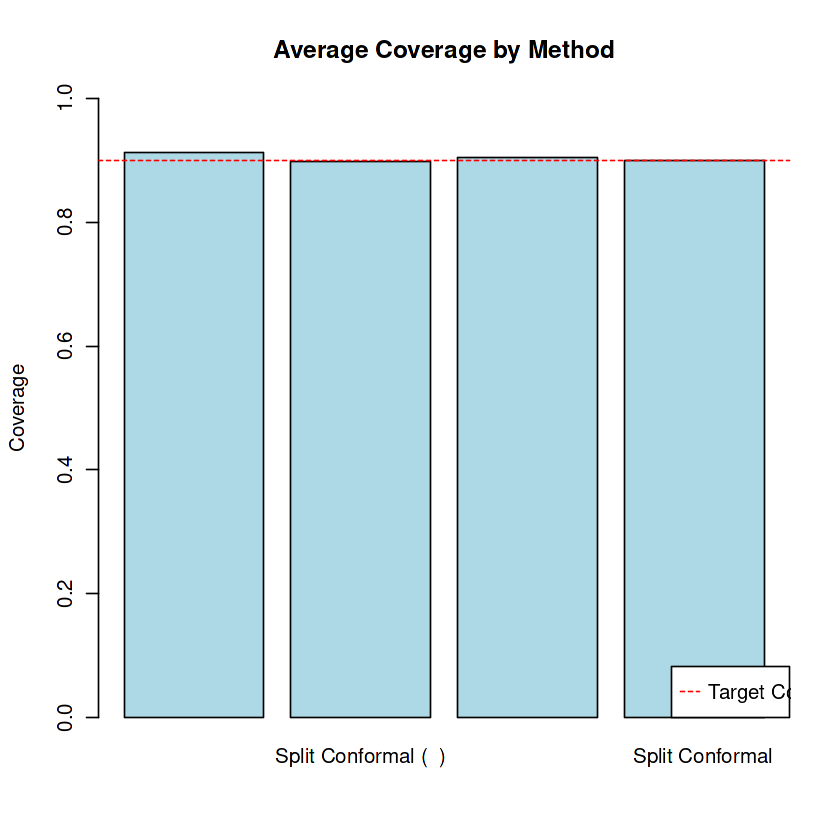

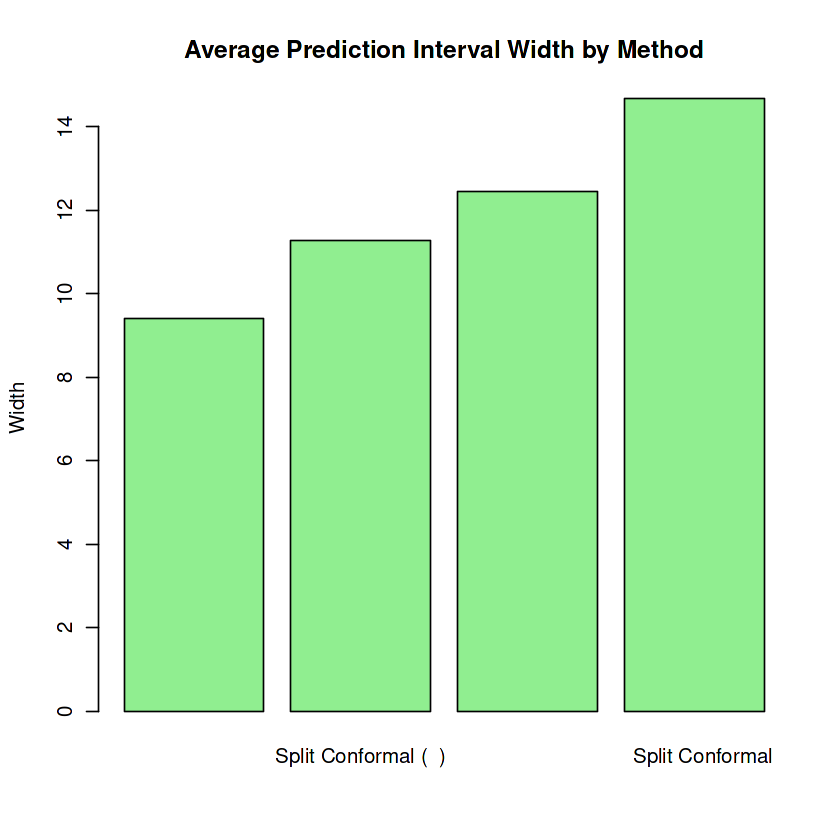

In [212]:
# 设置随机种子以确保结果可重复
set.seed(4399)
library(caret)

# 准备10折交叉验证
k_folds <- 10
fold_indices <- createFolds(y, k = k_folds, list = TRUE, returnTrain = FALSE)

# 创建存储结果的数据结构
methods <- c("传统线性模型", "Split Conformal (线性)", "Split Conformal (中位数)", "自适应Split Conformal")
result_coverage <- matrix(0, nrow = k_folds, ncol = length(methods))
result_width <- matrix(0, nrow = k_folds, ncol = length(methods))
colnames(result_coverage) <- methods
colnames(result_width) <- methods

# 设定显著性水平
alpha <- 0.10

# 执行10折交叉验证
for (fold in 1:k_folds) {
  # 获取当前折的测试集和训练集索引
  test_idx <- fold_indices[[fold]]
  train_idx <- setdiff(1:length(y), test_idx)
  
  # 分割数据
  X_train_fold <- X_final[train_idx, ]
  y_train_fold <- y[train_idx]
  X_test_fold <- X_final[test_idx, ]
  y_test_fold <- y[test_idx]
  
  # 方法1：传统线性模型
  lm_fit <- lm(y_train_fold ~ ., data = data.frame(y_train_fold, X_train_fold))
  lm_pred <- predict(lm_fit, newdata = data.frame(X_test_fold), interval = "prediction", level = 1-alpha)
  
  # 计算覆盖率和区间宽度
  coverage_lm <- mean(y_test_fold >= lm_pred[, "lwr"] & y_test_fold <= lm_pred[, "upr"])
  width_lm <- mean(lm_pred[, "upr"] - lm_pred[, "lwr"])
  
  # 将训练集平均分成两个子集L1和L2
  n_train <- length(y_train_fold)
  set.seed(4399 + fold)  # 确保每个fold的随机性相同
  # subset_idx <- sample(1:n_train, size = floor(n_train/2))
  subset_idx <- sample(1:n_train, size = floor(n_train*0.5))
    
  # L1用于训练模型，L2用于计算残差
  X_L1 <- X_train_fold[subset_idx, ]
  y_L1 <- y_train_fold[subset_idx]
  X_L2 <- X_train_fold[-subset_idx, ]
  y_L2 <- y_train_fold[-subset_idx]
  
  # 方法2：Split Conformal (线性模型)
  # 使用L1训练线性模型
  lm_L1 <- lm(y_L1 ~ ., data = data.frame(y_L1, X_L1))
  
  # 计算L2上的残差
  y_L2_pred <- predict(lm_L1, newdata = data.frame(X_L2))
  residuals_L2 <- abs(y_L2 - y_L2_pred)
  
  # 计算阈值（第k小的残差）
  k <- ceiling((length(y_L2) + 1) * (1-alpha))
  d <- sort(residuals_L2)[min(k, length(residuals_L2))]
  
  # 对测试集进行预测
  y_test_pred_lm <- predict(lm_L1, newdata = data.frame(X_test_fold))
  lm_conf_lower <- y_test_pred_lm - d
  lm_conf_upper <- y_test_pred_lm + d
  
  # 计算覆盖率和区间宽度
  coverage_conf_lm <- mean(y_test_fold >= lm_conf_lower & y_test_fold <= lm_conf_upper)
  width_conf_lm <- mean(lm_conf_upper - lm_conf_lower)
  
  # 方法3：Split Conformal (分位数回归)
  # 使用L1训练分位数回归模型
  library(quantreg)
  rq_L1 <- rq(y_L1 ~ ., data = data.frame(y_L1, X_L1), tau = 0.5)
  
  # 计算L2上的残差
  y_L2_pred_rq <- predict(rq_L1, newdata = data.frame(X_L2))
  residuals_L2_rq <- abs(y_L2 - y_L2_pred_rq)
  
  # 计算阈值
  d_rq <- sort(residuals_L2_rq)[min(k, length(residuals_L2_rq))]
  
  # 对测试集进行预测
  y_test_pred_rq <- predict(rq_L1, newdata = data.frame(X_test_fold))
  rq_conf_lower <- y_test_pred_rq - d_rq
  rq_conf_upper <- y_test_pred_rq + d_rq
  
  # 计算覆盖率和区间宽度
  coverage_conf_rq <- mean(y_test_fold >= rq_conf_lower & y_test_fold <= rq_conf_upper)
  width_conf_rq <- mean(rq_conf_upper - rq_conf_lower)
  
  # 方法4：自适应Split Conformal (分位数回归)
  # 使用L1拟合上下分位数回归
  rq_upper <- rq(y_L1 ~ ., data = data.frame(y_L1, X_L1), tau = 1 - alpha/2)
  rq_lower <- rq(y_L1 ~ ., data = data.frame(y_L1, X_L1), tau = alpha/2)
  
  # 计算L2上的一致性得分
  y_L2_pred_upper <- predict(rq_upper, newdata = data.frame(X_L2))
  y_L2_pred_lower <- predict(rq_lower, newdata = data.frame(X_L2))
  
  # 计算一致性得分
  S_L2 <- pmax(y_L2_pred_lower - y_L2, y_L2 - y_L2_pred_upper)
  
  # 计算阈值
  d_adaptive <- sort(S_L2)[min(k, length(S_L2))]
  
  # 对测试集进行预测
  y_test_pred_upper <- predict(rq_upper, newdata = data.frame(X_test_fold))
  y_test_pred_lower <- predict(rq_lower, newdata = data.frame(X_test_fold))
  
  # 构建最终预测区间
  adaptive_conf_lower <- y_test_pred_lower - d_adaptive
  adaptive_conf_upper <- y_test_pred_upper + d_adaptive
  
  # 计算覆盖率和区间宽度
  coverage_conf_adaptive <- mean(y_test_fold >= adaptive_conf_lower & y_test_fold <= adaptive_conf_upper)
  width_conf_adaptive <- mean(adaptive_conf_upper - adaptive_conf_lower)
  
  # 保存当前折的结果
  result_coverage[fold, ] <- c(coverage_lm, coverage_conf_lm, coverage_conf_rq, coverage_conf_adaptive)
  result_width[fold, ] <- c(width_lm, width_conf_lm, width_conf_rq, width_conf_adaptive)
}

# 计算平均覆盖率和区间宽度
avg_coverage <- colMeans(result_coverage)
avg_width <- colMeans(result_width)

# 创建最终结果数据框
results <- data.frame(
  Method = methods,
  Coverage = avg_coverage,
  Width = avg_width,
  TargetCoverage = 1 - alpha
)

# 打印结果
print(results)

# 可选：计算每种方法的标准差
sd_coverage <- apply(result_coverage, 2, sd)
sd_width <- apply(result_width, 2, sd)

results_with_sd <- data.frame(
  Method = methods,
  Coverage = avg_coverage,
  Coverage_SD = sd_coverage,
  Width = avg_width,
  Width_SD = sd_width,
  TargetCoverage = 1 - alpha
)

# 打印包含标准差的结果
print(results_with_sd)

# 可选：创建图表比较不同方法
barplot(avg_coverage, names.arg = methods, 
        main = "Average Coverage by Method", 
        ylab = "Coverage", 
        ylim = c(0, 1), 
        col = "lightblue")
abline(h = 1 - alpha, col = "red", lty = 2)
legend("bottomright", legend = "Target Coverage", col = "red", lty = 2)

barplot(avg_width, names.arg = methods, 
        main = "Average Prediction Interval Width by Method", 
        ylab = "Width", 
        col = "lightgreen")

In [213]:
# 计算平均覆盖率和区间宽度
avg_coverage <- colMeans(result_coverage)
avg_width <- colMeans(result_width)
# 计算区间半径（即区间宽度的一半）
avg_radius <- avg_width / 2

# 创建最终结果数据框
results <- data.frame(
  Method = methods,
  Coverage = avg_coverage,
  Width = avg_width,
  Radius = avg_radius,
  TargetCoverage = 1 - alpha
)

# 打印结果
print(results)

# 可选：计算每种方法的标准差
sd_coverage <- apply(result_coverage, 2, sd)
sd_width <- apply(result_width, 2, sd)
sd_radius <- sd_width / 2

results_with_sd <- data.frame(
  Method = methods,
  Coverage = avg_coverage,
  Coverage_SD = sd_coverage,
  Width = avg_width,
  Width_SD = sd_width,
  Radius = avg_radius,
  Radius_SD = sd_radius,
  TargetCoverage = 1 - alpha
)

# 打印包含标准差的结果
print(results_with_sd)

                                           Method  Coverage     Width   Radius
传统线性模型                         传统线性模型 0.9130132  9.414619 4.707309
Split Conformal (线性)     Split Conformal (线性) 0.8976314 11.271003 5.635501
Split Conformal (中位数) Split Conformal (中位数) 0.9039916 12.459185 6.229593
自适应Split Conformal       自适应Split Conformal 0.8992159 14.678870 7.339435
                         TargetCoverage
传统线性模型                        0.9
Split Conformal (线性)              0.9
Split Conformal (中位数)            0.9
自适应Split Conformal               0.9
                                           Method  Coverage Coverage_SD
传统线性模型                         传统线性模型 0.9130132  0.04386694
Split Conformal (线性)     Split Conformal (线性) 0.8976314  0.04866161
Split Conformal (中位数) Split Conformal (中位数) 0.9039916  0.05508930
自适应Split Conformal       自适应Split Conformal 0.8992159  0.02274763
                             Width  Width_SD   Radius  Radius_SD TargetCoverage
传统线性模型              9.414619 0.1006

# 9. 置信区间可视化

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


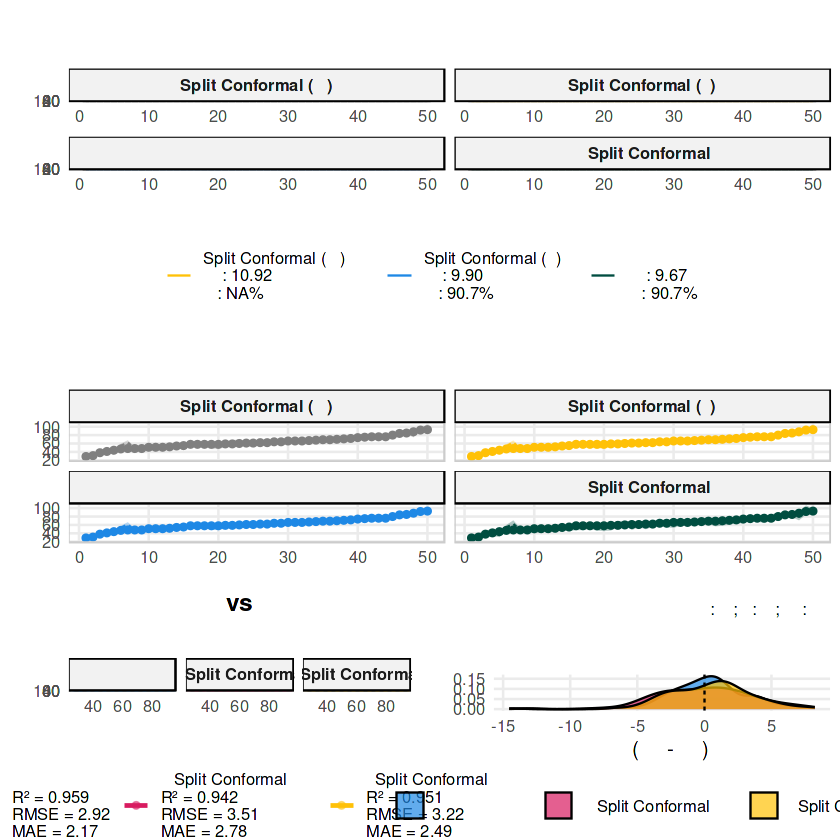

In [225]:
# =======================
# 第九步：可视化预测区间（优化版）
# =======================

# 加载必要的包
library(ggplot2)
library(dplyr)
library(scales)
library(gridExtra)

# 创建可视化，为了清晰仅展示部分测试数据点
sample_size <- min(50, length(y_test))
sample_idx <- sample(1:length(y_test), sample_size)

# 准备数据
plot_data <- data.frame(
  Index = rep(1:sample_size, 4),
  True = rep(y_test[sample_idx], 4),
  Predicted = c(lm_pred[sample_idx, "fit"], y_test_pred[sample_idx], 
                y_test_pred_rq[sample_idx], y_test_pred_rq[sample_idx]),
  Lower = c(lm_pred[sample_idx, "lwr"], lm_conformal_lower[sample_idx], 
            rq_conformal_lower[sample_idx], adaptive_conformal_lower[sample_idx]),
  Upper = c(lm_pred[sample_idx, "upr"], lm_conformal_upper[sample_idx], 
            rq_conformal_upper[sample_idx], adaptive_conformal_upper[sample_idx]),
  Method = rep(c("传统线性模型", "Split Conformal (线性)", 
                "Split Conformal (中位数)", "自适应Split Conformal"), each = sample_size)
)

# 计算每种方法的平均区间宽度，用于图例显示
avg_widths <- plot_data %>%
  group_by(Method) %>%
  summarize(AvgWidth = mean(Upper - Lower, na.rm = TRUE),
            Coverage = results$Coverage[match(first(Method), results$Method)]) %>%
  mutate(Label = sprintf("%s\n平均宽度: %.2f\n覆盖率: %.1f%%", 
                        Method, AvgWidth, Coverage * 100))

# 颜色设置
method_colors <- c("传统线性模型" = "#1E88E5", 
                  "Split Conformal (线性)" = "#FFC107", 
                  "Split Conformal (分位数)" = "#D81B60",
                  "自适应Split Conformal" = "#004D40")

# 创建预测区间比较图
p1 <- ggplot(plot_data, aes(x = Index, y = Predicted, color = Method, fill = Method)) +
  geom_ribbon(aes(ymin = Lower, ymax = Upper), alpha = 0.3, color = NA) +
  geom_line(size = 0.5) +
  geom_point(aes(y = True), shape = 18, size = 2, color = "black") +
  scale_color_manual(values = method_colors, labels = avg_widths$Label) +
  scale_fill_manual(values = method_colors) +
  facet_wrap(~ Method, scales = "free_x", nrow = 2) +
  theme_minimal(base_size = 12) +
  theme(
    plot.title = element_text(face = "bold", hjust = 0.5),
    plot.subtitle = element_text(hjust = 0.5),
    legend.position = "bottom",
    legend.title = element_blank(),
    legend.box = "horizontal",
    panel.grid.minor = element_blank(),
    panel.border = element_rect(fill = NA, color = "gray80"),
    strip.background = element_rect(fill = "gray95"),
    strip.text = element_text(face = "bold")
  ) +
  labs(
    title = "不同方法的预测区间比较", 
    subtitle = "各种方法产生的预测区间宽度与覆盖率对比",
    x = "样本索引", 
    y = "年龄预测值"
  ) +
  guides(fill = "none")

# 为了便于比较，添加一个排序图
ordered_data <- plot_data %>%
  arrange(True) %>%
  group_by(Method) %>%
  mutate(OrderIndex = row_number())

p2 <- ggplot(ordered_data, aes(x = OrderIndex, y = True, color = Method)) +
  geom_ribbon(aes(ymin = Lower, ymax = Upper, fill = Method), alpha = 0.3, color = NA) +
  geom_point(size = 1.5) +
  geom_line(aes(y = Predicted), linetype = "dashed") +
  scale_color_manual(values = method_colors) +
  scale_fill_manual(values = method_colors) +
  facet_wrap(~ Method, nrow = 2) +
  theme_minimal(base_size = 12) +
  theme(
    plot.title = element_text(face = "bold", hjust = 0.5),
    plot.subtitle = element_text(hjust = 0.5),
    legend.position = "none",
    panel.grid.minor = element_blank(),
    panel.border = element_rect(fill = NA, color = "gray80"),
    strip.background = element_rect(fill = "gray95"),
    strip.text = element_text(face = "bold")
  ) +
  labs(
    title = "按真实年龄排序的预测区间", 
    subtitle = "各预测区间相对于真实年龄的表现",
    x = "排序后的样本索引", 
    y = "年龄值",
    caption = "实线: 真实值; 虚线: 预测值; 彩色区域: 预测区间"
  )

# =======================
# 第十步：年龄预测误差分析（优化版）
# =======================

# 准备真实年龄与预测年龄的散点图数据
plot_data_scatter <- data.frame(
  TrueAge = rep(y_test, 3),
  PredictedAge = c(lm_pred[, "fit"], y_test_pred, y_test_pred_rq),
  Method = rep(c("传统线性模型", "线性Split Conformal", "分位数Split Conformal"), each = length(y_test)),
  Error = c(y_test - lm_pred[, "fit"], y_test - y_test_pred, y_test - y_test_pred_rq)
)

# 计算R²值
r2_values <- plot_data_scatter %>%
  group_by(Method) %>%
  summarize(
    R2 = 1 - sum((TrueAge - PredictedAge)^2) / sum((TrueAge - mean(TrueAge))^2),
    RMSE = sqrt(mean((TrueAge - PredictedAge)^2)),
    MAE = mean(abs(TrueAge - PredictedAge))
  ) %>%
  mutate(Label = sprintf("%s\nR² = %.3f\nRMSE = %.2f\nMAE = %.2f",
                         Method, R2, RMSE, MAE))

# 为每种方法添加回归线
scatter_colors <- c("传统线性模型" = "#1E88E5", 
                    "线性Split Conformal" = "#FFC107", 
                    "分位数Split Conformal" = "#D81B60")

p3 <- ggplot(plot_data_scatter, aes(x = TrueAge, y = PredictedAge, color = Method)) +
  geom_point(alpha = 0.5) +
  geom_smooth(method = "lm", se = FALSE, linetype = "solid", size = 1) +
  geom_abline(intercept = 0, slope = 1, linetype = "dashed", color = "gray30", size = 0.8) +
  scale_color_manual(values = scatter_colors, labels = r2_values$Label) +
  facet_wrap(~ Method, nrow = 1) +
  theme_minimal(base_size = 12) +
  theme(
    plot.title = element_text(face = "bold", hjust = 0.5),
    plot.subtitle = element_text(hjust = 0.5),
    legend.position = "bottom",
    legend.title = element_blank(),
    panel.grid.minor = element_blank(),
    panel.border = element_rect(fill = NA, color = "gray80"),
    strip.background = element_rect(fill = "gray95"),
    strip.text = element_text(face = "bold")
  ) +
  labs(
    title = "真实年龄 vs 预测年龄", 
    subtitle = "不同方法的预测准确性比较",
    x = "真实年龄", 
    y = "预测年龄",
    caption = "虚线: 完美预测; 实线: 实际拟合"
  )

# 添加误差分布图
p4 <- ggplot(plot_data_scatter, aes(x = Error, fill = Method)) +
  geom_density(alpha = 0.7) +
  scale_fill_manual(values = scatter_colors) +
  geom_vline(xintercept = 0, linetype = "dashed", color = "black") +
  theme_minimal(base_size = 12) +
  theme(
    plot.title = element_text(face = "bold", hjust = 0.5),
    legend.position = "bottom",
    legend.title = element_blank(),
    panel.grid.minor = element_blank()
  ) +
  labs(
    title = "预测误差分布", 
    x = "误差 (真实年龄 - 预测年龄)", 
    y = "密度"
  )

# 保存所有图表
ggsave("prediction_intervals_improved.png", plot = p1, width = 12, height = 10, dpi = 150)
ggsave("prediction_intervals_ordered.png", plot = p2, width = 12, height = 10, dpi = 150)
ggsave("age_prediction_scatter_improved.png", plot = p3, width = 14, height = 6, dpi = 150)
ggsave("prediction_error_distribution.png", plot = p4, width = 10, height = 6, dpi = 150)

# 使用gridExtra将多个图表组合在一起
combined_plot <- grid.arrange(
  p1, p2, p3, p4,
  layout_matrix = rbind(c(1, 1), c(2, 2), c(3, 4)),
  heights = c(3, 3, 2)
)

ggsave("combined_analysis_plots.png", plot = combined_plot, width = 16, height = 18, dpi = 150)

## 9.2

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


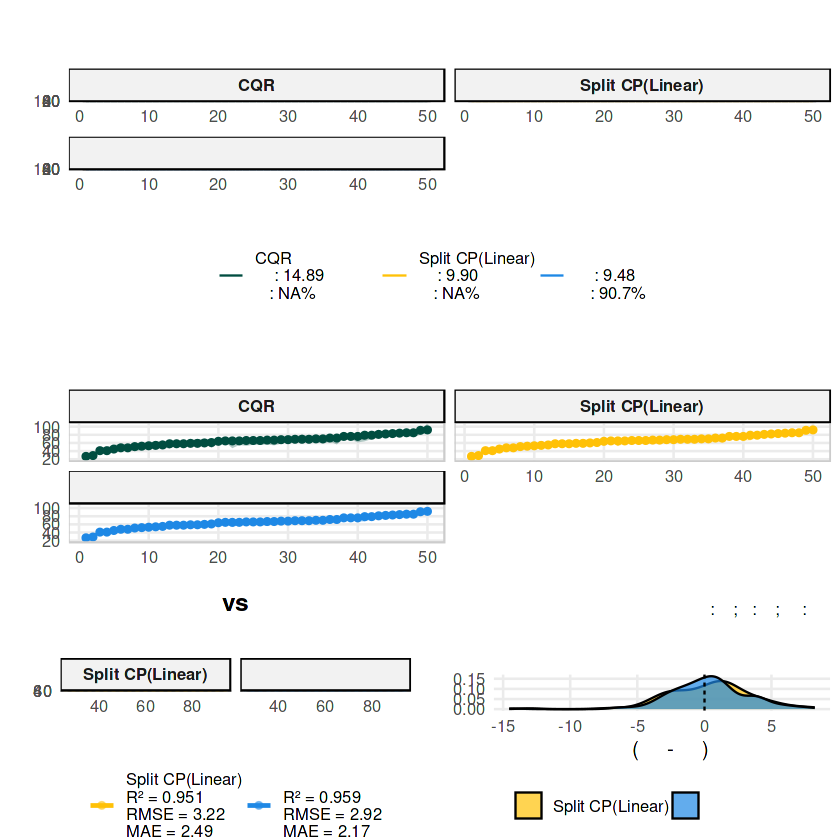

In [226]:
# =======================
# 第九步：可视化预测区间（优化版）
# =======================

# 加载必要的包
library(ggplot2)
library(dplyr)
library(scales)
library(gridExtra)

# 创建可视化，为了清晰仅展示部分测试数据点
sample_size <- min(50, length(y_test))
sample_idx <- sample(1:length(y_test), sample_size)

# 准备数据
plot_data <- data.frame(
  Index = rep(1:sample_size, 3),
  True = rep(y_test[sample_idx], 3),
  Predicted = c(lm_pred[sample_idx, "fit"], y_test_pred[sample_idx], 
                y_test_pred_rq[sample_idx]),
  Lower = c(lm_pred[sample_idx, "lwr"], lm_conformal_lower[sample_idx], 
            adaptive_conformal_lower[sample_idx]),
  Upper = c(lm_pred[sample_idx, "upr"], lm_conformal_upper[sample_idx], 
            adaptive_conformal_upper[sample_idx]),
  Method = rep(c("传统线性模型", "Split CP(Linear)", "CQR"), each = sample_size)
)

# 计算每种方法的平均区间宽度，用于图例显示
avg_widths <- plot_data %>%
  group_by(Method) %>%
  summarize(AvgWidth = mean(Upper - Lower, na.rm = TRUE),
            Coverage = results$Coverage[match(first(Method), results$Method)]) %>%
  mutate(Label = sprintf("%s\n平均宽度: %.2f\n覆盖率: %.1f%%", 
                        Method, AvgWidth, Coverage * 100))

# 颜色设置
method_colors <- c("传统线性模型" = "#1E88E5", 
                  "Split CP(Linear)" = "#FFC107", 
                  "CQR" = "#004D40")

# 创建预测区间比较图
p1 <- ggplot(plot_data, aes(x = Index, y = Predicted, color = Method, fill = Method)) +
  geom_ribbon(aes(ymin = Lower, ymax = Upper), alpha = 0.3, color = NA) +
  geom_line(size = 0.5) +
  geom_point(aes(y = True), shape = 18, size = 2, color = "black") +
  scale_color_manual(values = method_colors, labels = avg_widths$Label) +
  scale_fill_manual(values = method_colors) +
  facet_wrap(~ Method, scales = "free_x", nrow = 2) +
  theme_minimal(base_size = 12) +
  theme(
    plot.title = element_text(face = "bold", hjust = 0.5),
    plot.subtitle = element_text(hjust = 0.5),
    legend.position = "bottom",
    legend.title = element_blank(),
    legend.box = "horizontal",
    panel.grid.minor = element_blank(),
    panel.border = element_rect(fill = NA, color = "gray80"),
    strip.background = element_rect(fill = "gray95"),
    strip.text = element_text(face = "bold")
  ) +
  labs(
    title = "不同方法的预测区间比较", 
    subtitle = "各种方法产生的预测区间宽度与覆盖率对比",
    x = "样本索引", 
    y = "年龄预测值"
  ) +
  guides(fill = "none")

# 为了便于比较，添加一个排序图
ordered_data <- plot_data %>%
  arrange(True) %>%
  group_by(Method) %>%
  mutate(OrderIndex = row_number())

p2 <- ggplot(ordered_data, aes(x = OrderIndex, y = True, color = Method)) +
  geom_ribbon(aes(ymin = Lower, ymax = Upper, fill = Method), alpha = 0.3, color = NA) +
  geom_point(size = 1.5) +
  geom_line(aes(y = Predicted), linetype = "dashed") +
  scale_color_manual(values = method_colors) +
  scale_fill_manual(values = method_colors) +
  facet_wrap(~ Method, nrow = 2) +
  theme_minimal(base_size = 12) +
  theme(
    plot.title = element_text(face = "bold", hjust = 0.5),
    plot.subtitle = element_text(hjust = 0.5),
    legend.position = "none",
    panel.grid.minor = element_blank(),
    panel.border = element_rect(fill = NA, color = "gray80"),
    strip.background = element_rect(fill = "gray95"),
    strip.text = element_text(face = "bold")
  ) +
  labs(
    title = "按真实年龄排序的预测区间", 
    subtitle = "各预测区间相对于真实年龄的表现",
    x = "排序后的样本索引", 
    y = "年龄值",
    caption = "实线: 真实值; 虚线: 预测值; 彩色区域: 预测区间"
  )

# =======================
# 第十步：年龄预测误差分析（优化版）
# =======================

# 准备真实年龄与预测年龄的散点图数据
plot_data_scatter <- data.frame(
  TrueAge = rep(y_test, 2),
  PredictedAge = c(lm_pred[, "fit"], y_test_pred),
  Method = rep(c("传统线性模型", "Split CP(Linear)"), each = length(y_test)),
  Error = c(y_test - lm_pred[, "fit"], y_test - y_test_pred)
)

# 计算R²值
r2_values <- plot_data_scatter %>%
  group_by(Method) %>%
  summarize(
    R2 = 1 - sum((TrueAge - PredictedAge)^2) / sum((TrueAge - mean(TrueAge))^2),
    RMSE = sqrt(mean((TrueAge - PredictedAge)^2)),
    MAE = mean(abs(TrueAge - PredictedAge))
  ) %>%
  mutate(Label = sprintf("%s\nR² = %.3f\nRMSE = %.2f\nMAE = %.2f",
                         Method, R2, RMSE, MAE))

# 为每种方法添加回归线
scatter_colors <- c("传统线性模型" = "#1E88E5", 
                    "Split CP(Linear)" = "#FFC107")

p3 <- ggplot(plot_data_scatter, aes(x = TrueAge, y = PredictedAge, color = Method)) +
  geom_point(alpha = 0.5) +
  geom_smooth(method = "lm", se = FALSE, linetype = "solid", size = 1) +
  geom_abline(intercept = 0, slope = 1, linetype = "dashed", color = "gray30", size = 0.8) +
  scale_color_manual(values = scatter_colors, labels = r2_values$Label) +
  facet_wrap(~ Method, nrow = 1) +
  theme_minimal(base_size = 12) +
  theme(
    plot.title = element_text(face = "bold", hjust = 0.5),
    plot.subtitle = element_text(hjust = 0.5),
    legend.position = "bottom",
    legend.title = element_blank(),
    panel.grid.minor = element_blank(),
    panel.border = element_rect(fill = NA, color = "gray80"),
    strip.background = element_rect(fill = "gray95"),
    strip.text = element_text(face = "bold")
  ) +
  labs(
    title = "真实年龄 vs 预测年龄", 
    subtitle = "不同方法的预测准确性比较",
    x = "真实年龄", 
    y = "预测年龄",
    caption = "虚线: 完美预测; 实线: 实际拟合"
  )

# 添加误差分布图
p4 <- ggplot(plot_data_scatter, aes(x = Error, fill = Method)) +
  geom_density(alpha = 0.7) +
  scale_fill_manual(values = scatter_colors) +
  geom_vline(xintercept = 0, linetype = "dashed", color = "black") +
  theme_minimal(base_size = 12) +
  theme(
    plot.title = element_text(face = "bold", hjust = 0.5),
    legend.position = "bottom",
    legend.title = element_blank(),
    panel.grid.minor = element_blank()
  ) +
  labs(
    title = "预测误差分布", 
    x = "误差 (真实年龄 - 预测年龄)", 
    y = "密度"
  )

# 保存所有图表
ggsave("prediction_intervals_improved.png", plot = p1, width = 12, height = 10, dpi = 150)
ggsave("prediction_intervals_ordered.png", plot = p2, width = 12, height = 10, dpi = 150)
ggsave("age_prediction_scatter_improved.png", plot = p3, width = 14, height = 6, dpi = 150)
ggsave("prediction_error_distribution.png", plot = p4, width = 10, height = 6, dpi = 150)

# 使用gridExtra将多个图表组合在一起
combined_plot <- grid.arrange(
  p1, p2, p3, p4,
  layout_matrix = rbind(c(1, 1), c(2, 2), c(3, 4)),
  heights = c(3, 3, 2)
)

ggsave("combined_analysis_plots.png", plot = combined_plot, width = 16, height = 18, dpi = 150)

# =======================
# 第十一步：保存结果
# =======================

In [80]:
# =======================
# 第十步：年龄预测误差分析
# =======================

# 计算不同方法的预测误差 (RMSE和MAE)
rmse_lm <- sqrt(mean((y_test - lm_pred[, "fit"])^2))
mae_lm <- mean(abs(y_test - lm_pred[, "fit"]))

rmse_conformal <- sqrt(mean((y_test - y_test_pred)^2))
mae_conformal <- mean(abs(y_test - y_test_pred))

rmse_rq <- sqrt(mean((y_test - y_test_pred_rq)^2))
mae_rq <- mean(abs(y_test - y_test_pred_rq))

# 创建误差结果数据框
error_results <- data.frame(
  Method = c("传统线性模型", "线性Split Conformal", "分位数Split Conformal"),
  RMSE = c(rmse_lm, rmse_conformal, rmse_rq),
  MAE = c(mae_lm, mae_conformal, mae_rq)
)

# 打印误差结果
print(error_results)

                 Method      RMSE       MAE
1          传统线性模型 19.567370 16.288018
2   线性Split Conformal  2.789736  2.138323
3 分位数Split Conformal 19.884824 16.254285


In [67]:
# =======================
# 第十一步：保存结果
# =======================

# 保存结果到文件
write.csv(results, file = "prediction_interval_comparison.csv", row.names = FALSE)
write.csv(error_results, file = "prediction_error_comparison.csv", row.names = FALSE)


# 汇总结果
cat("=== 预测区间评估结果 ===\n")
print(results)
cat("\n=== 预测误差评估结果 ===\n")
print(error_results)
cat("\n预测区间和误差评估图已保存为PNG文件。\n")

# 提供结果解释
cat("\n结果解释:\n")
cat("1. 传统线性模型的预测区间基于线性回归的假设，")
cat("假设误差项服从正态分布且方差恒定。\n")
cat("2. Split Conformal预测区间不基于分布假设，")
cat("通过校准集的残差分布来构建，更具有适应性。\n")
cat("3. 基于分位数回归的Split Conformal预测区间")
cat("适用于异方差情况，可以提供不对称的预测区间。\n")
cat("4. 自适应Split Conformal方法结合了两个分位数回归模型，")
cat("针对每个测试样本提供个性化的预测区间。\n")

=== 预测区间评估结果 ===
                    Method  Coverage    Width
1             传统线性模型 0.9435897 12.20292
2   Split Conformal (线性) 0.9538462 14.26917
3 Split Conformal (分位数) 0.9589744 15.43781
4    自适应Split Conformal 0.9230769 14.53576

=== 预测误差评估结果 ===
                 Method     RMSE      MAE
1          传统线性模型 3.263551 2.432845
2   线性Split Conformal 3.314026 2.543843
3 分位数Split Conformal 3.522170 2.726682

预测区间和误差评估图已保存为PNG文件。

结果解释:
1. 传统线性模型的预测区间基于线性回归的假设，假设误差项服从正态分布且方差恒定。
2. Split Conformal预测区间不基于分布假设，通过校准集的残差分布来构建，更具有适应性。
3. 基于分位数回归的Split Conformal预测区间适用于异方差情况，可以提供不对称的预测区间。
4. 自适应Split Conformal方法结合了两个分位数回归模型，针对每个测试样本提供个性化的预测区间。


# 12.特征基因映射
提取自适应弹性网络选择的基因位点的生物解释

In [63]:
# 将最终特征保存
final_features <- final_vars
final_feature_set <-final_features
print(length(final_features))
X_final <- X[, final_feature_set]  # 假设final_feature_set已经定义

[1] 137


In [64]:
selected_features<-colnames(X_final)
selected_features

[1] "cg16867657" "cg08097417" "cg07571951" "cg02452500" "cg05826458"
  [6] "cg22213242" "cg10172783" "cg06231995" "cg15853350" "cg10640944"
 [11] "cg14778622" "cg25584930" "cg24167372" "cg03399905" "cg03671075"
 [16] "cg04689379" "cg19037555" "cg19034132" "cg02867102" "cg10418289"
 [21] "cg01541867" "cg16008966" "cg18352916" "cg18240400" "cg00058879"
 [26] "cg06392169" "cg08540945" "cg19035107" "cg10492801" "cg02924487"
 [31] "cg10317717" "cg07920503" "cg04833853" "cg07073120" "cg02250044"
 [36] "cg08196106" "cg19711579" "cg10726725" "cg27544190" "cg17928883"
 [41] "cg02574509" "cg25908434" "cg18579564" "cg06998210" "cg21877010"
 [46] "cg06493994" "cg24436715" "cg07247419" "cg04604946" "cg14236665"
 [51] "cg15874649" "cg25839687" "cg18324467" "cg01703205" "cg11136562"
 [56] "cg08719712" "cg18405900" "cg03208198" "cg02970836" "cg21874213"
 [61] "cg22555517" "cg26290632" "cg04557677" "cg26635214" "cg04400980"
 [66] "cg27459121" "cg22268271" "cg26888530" "cg09593028" "cg25701100"
 [71] "cg19657320" "cg21809447" "cg24244270" "cg23651585" "cg01528542"
 [76] "cg05377515" "cg00961418" "cg27397465" "cg18310639" "cg03515869"
 [81] "cg10778288" "cg03701210" "cg23409075" "cg02127172" "cg25670839"
 [86] "cg23517469" "cg21469707" "cg22158769" "cg22433862" "cg00850073"
 [91] "cg23361092" "cg13251666" "cg04822808" "cg22358580" "cg20367218"
 [96] "cg20102336" "cg01137708" "cg06292277" "cg09474229" "cg21868031"
[101] "cg05331060" "cg07683873" "cg05599106" "cg02204637" "cg06672120"
[106] "cg01052666" "cg20744625" "cg02527528" "cg17757602" "cg17216759"
[111] "cg23688465" "cg25478614" "cg05203217" "cg23994468" "cg03660500"
[116] "cg20648272" "cg03132166" "cg06824727" "cg03065175" "cg24526702"
[121] "cg25103492" "cg20426994" "cg03032497" "cg08905130" "cg12658720"
[126] "cg04640194" "cg10981464" "cg07927379" "cg15332241" "cg24516367"
[131] "cg03500977" "cg23357854" "cg07850604" "cg11731626" "cg01844642"
[136] "cg06158227" "cg16480692"

In [65]:
# 获取选定探针对应的基因名
# 方法1: 使用平台注释信息
platform_anno <- fData(gse40279)  # 获取平台注释信息

# 提取基因符号列 - 列名可能因平台而异，常见的有"Symbol", "Gene Symbol", "UCSC_RefGene_Name"等
# 对于Illumina 450K甲基化芯片，通常使用"UCSC_RefGene_Name"
gene_symbols <- platform_anno[selected_features, "UCSC_RefGene_Name"]

# 创建一个包含探针ID和对应基因的数据框
probe_gene_map <- data.frame(
  ProbeID = selected_features,
  Gene = gene_symbols
)

# 如果一个探针映射到多个基因(以分号分隔)，可以进一步处理
probe_gene_map$Gene <- sapply(probe_gene_map$Gene, function(x) {
  if(is.na(x)) return(NA)
  unique_genes <- unique(unlist(strsplit(as.character(x), ";")))
  paste(unique_genes, collapse=";")
})

# 输出结果
write.csv(probe_gene_map, "selected_probes_gene_mapping.csv", row.names=FALSE)

In [66]:
# 方法2: 使用注释包(以Illumina 450K甲基化芯片为例)
if (!requireNamespace("IlluminaHumanMethylation450kanno.ilmn12.hg19", quietly = TRUE)) {
  BiocManager::install("IlluminaHumanMethylation450kanno.ilmn12.hg19")
}
library(IlluminaHumanMethylation450kanno.ilmn12.hg19)

# 加载注释数据
data(IlluminaHumanMethylation450kanno.ilmn12.hg19)
annot <- getAnnotation(IlluminaHumanMethylation450kanno.ilmn12.hg19)

# 提取对应的基因名
gene_info <- annot[selected_features, c("Name", "UCSC_RefGene_Name")]

# 输出结果
write.csv(gene_info, "selected_probes_annotation.csv", row.names=FALSE)

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: http://cran.rstudio.com/

Bioconductor version 3.19 (BiocManager 1.30.23), R 4.4.0 (2024-04-24)

Installing package(s) 'IlluminaHumanMethylation450kanno.ilmn12.hg19'

also installing the dependencies ‘Rhtslib’, ‘Rsamtools’, ‘GenomicAlignments’, ‘BiocIO’, ‘restfulr’, ‘zlibbioc’, ‘rtracklayer’, ‘KEGGREST’, ‘XVector’, ‘MatrixGenerics’, ‘S4Arrays’, ‘GenomicFeatures’, ‘AnnotationDbi’, ‘UCSC.utils’, ‘GenomeInfoDbData’, ‘multtest’, ‘scrime’, ‘sparseMatrixStats’, ‘annotate’, ‘SparseArray’, ‘GenomicRanges’, ‘SummarizedExperiment’, ‘Biostrings’, ‘bumphunter’, ‘S4Vectors’, ‘GenomeInfoDb’, ‘IRanges’, ‘nor1mix’, ‘siggenes’, ‘preprocessCore’, ‘illuminaio’, ‘DelayedMatrixStats’, ‘genefilter’, ‘DelayedArray’, ‘HDF5Array’, ‘BiocParallel’, ‘minfi’


Old packages: 'abind', 'actuar', 'ade4', 'adegraphics', 'adehabitatHR',
  'adehabitatLT', '